<div style="display: flex; justify-content: space-between;">
    <img src="https://teias.institute/wp-content/uploads/2021/07/TEIAS-LOGO-DARK.png" width="300" alt="TEIAS Institute logo" />
    <img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2019/09/11134058/What-is-data-science-2.jpg" width="300" alt="Data Science image" />
</div>

# <span style='font-family: "Georgia", Times, "Times New Roman", serif; color:#3498DB;'>**Statistical Inference Course (Spring 2024)**</span>

## <span style='font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; color:#2E86C1;'>**Project - Phase - 2**</span>

<hr>

### <span style='font-family: "Courier New", Courier, monospace; color:#27AE30;'>**Professor**</span>

*   Dr. Behnam Bahrak

### <span style='font-family: "Courier New", Courier, monospace; color:#E67E22;'>**Student**</span>

*   Ali Zahedzadeh


<hr>

### <span style='font-family: "Arial", sans-serif; font-size: 1.3em; font-weight: bold;'>About Dataset</span>

<div dir=ltr style="direction: ltr;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<center>

| Column | Description |
|:-----------:|:------:|
| `age` |Age of the patient in completed years|
| `sex` | Gender of the patient|
| `cp` | Chest Pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)|
| `trestbps` | resting blood pressure (in mm Hg)|
| `chol` | cholestoral in mg/dl fetched via BMI sensor|
| `fbs` |(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|
| `restecg` | 0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria|
| `thalach` | maximum heart rate achieved|
| `exang` |Exercise-induced angina (1 = yes, 0 = no)|
| `oldpeak` | Previous peak|
| `slope` | The slope of the peak exercise ST segment|
| `ca` | number of major vessels (0-4)|
| `thal`	 | 0 = Normal , 1 = Fixed , 2 = Reversible , 3 = Non-Reversible|
| `target` | 0 = less chance of heart attack , 1 = more chance of heart attack|

</center>
</font>
</div>

**More details for some columns**

**```Cp Column```** Values :

1. **Typical Angina (0):** This category likely represents chest pain that conforms to the classic symptoms associated with angina, often characterized by a sensation of pressure, squeezing, or burning in the chest, which may radiate to the arms, neck, or jaw.

2. **Atypical Angina (1):** Chest pain falling into this category is expected to deviate from the classic symptoms of angina. It may present with non-specific or less common symptoms, making it atypical in nature.

3. **Non-Anginal Pain (2):** This category likely includes chest pain that is not related to angina. It might encompass a variety of sensations, and its classification implies a deviation from the typical symptoms associated with angina.

4. **Asymptomatic (3):** Individuals categorized as asymptomatic are expected to exhibit no noticeable symptoms of chest pain. This group may be crucial for understanding individuals who do not manifest typical warning signs but still may be at risk for cardiovascular issues.

**```Ca Column```** Values :

This variable is likely a crucial parameter in assessing the severity of cardiovascular conditions. This variable is expected to denote the count of major blood vessels colored by fluoroscopy, and it ranges from 0 to 4. Each value in this range signifies a different level of vascular involvement, which could be indicative of the extent and severity of coronary artery disease.

1. **0:** This category might represent cases where there are no major vessels with a coloration observed during fluoroscopy, suggesting a potential absence of significant coronary artery disease.

2. **1-4:** These values likely indicate an increasing severity of coronary artery disease, with a higher number corresponding to a greater degree of vessel involvement.

**```Thal Column```** Values :

Thal column is categorical and represents different types of thalassemia or related conditions. The values are as follows:

- **0 (null):** This value may indicate the absence of information or a null/missing entry in the dataset for the "Thal" variable.

- **1 (fixed defect):** This category likely represents a specific type of thalassemia characterized by a fixed defect.

- **2 (normal):** This value may indicate a normal condition, suggesting the absence of thalassemia or any related defects.

- **3 (reversible defect):** This category could imply a form of thalassemia or a related condition that is potentially reversible.



<hr>

### <span style='font-family: "Arial", sans-serif; font-size: 1.3em; font-weight: bold;'>Import Libraries</span>

**Read dataset**

In [62]:
library(ggplot2)
library(ggcorrplot)
library(Hmisc)
library(corrplot)
library(reshape2)
library(ggExtra)
library(gridExtra)
library(GGally)
library(hexbin)
library(plotly)
library(vcd)
library(ggmosaic)
library(dplyr)
library(boot)
library(caret)
library(Metrics)
library(MASS)
library(car)
library(tidyverse)
library(pROC)

**Read dataset**

In [3]:
heart_data <- read.csv("heart.csv")
head(heart_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


**Check Null values**

We can see we don't have any null values. (so we don't need to fill these values .)

In [4]:
# Check for missing values in the dataset
missing_values_summary <- colSums(is.na(heart_data))

# Display the summary of missing values for each variable
print(missing_values_summary)

     age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal   target 
       0        0        0        0        0        0 


**Check duplicate data**

We can see we have lots of duplicate data (It's bad we will remove it)

In [5]:
# Check for duplicate rows
duplicate_rows <- heart_data[duplicated(heart_data), ]

# Display the number of duplicate rows
num_duplicates <- nrow(duplicate_rows)
cat("Number of duplicate rows:", num_duplicates, "\n")

# If there are any duplicates, display them
if (num_duplicates > 0) {
  print(duplicate_rows)
}

Number of duplicate rows: 723 
     age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
16    34   0  1      118  210   0       1     192     0     0.7     2  0    2
32    50   0  1      120  244   0       1     162     0     1.1     2  0    2
44    46   1  0      120  249   0       0     144     0     0.8     2  0    3
56    55   1  0      140  217   0       1     111     1     5.6     0  0    3
62    66   0  2      146  278   0       0     152     0     0.0     1  1    2
65    29   1  1      130  204   0       0     202     0     0.0     2  0    2
80    52   1  1      134  201   0       1     158     0     0.8     2  1    2
83    46   1  2      150  231   0       1     147     0     3.6     1  0    2
84    38   1  2      138  175   0       1     173     0     0.0     2  4    2
85    37   0  2      120  215   0       1     170     0     0.0     2  0    2
87    58   1  2      140  211   1       0     165     0     0.0     2  0    2
93    63   1  0      140  187   0

**Remove duplicate rows**

In [6]:
# Remove duplicate rows
heart_data <- heart_data[!duplicated(heart_data), ]

# Verify that duplicates are removed
num_duplicates_after <- nrow(heart_data[duplicated(heart_data), ])
cat("Number of duplicate rows after removal:", num_duplicates_after, "\n")

Number of duplicate rows after removal: 0 


In [7]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
8,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
9,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


<hr>

### <span style='color:#2ECC71; font-family: "Arial", sans-serif; font-size: 1.3em; font-weight: bold;'>Question 1</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
Consider two categorical variables in your dataset for which at least one of 
them has more than two levels. Using these, follow these steps: 

</span>



#### <span style='color:#E74C3C; font-family: "Arial", sans-serif; font-size: 1.1em; font-weight: bold;'>Answer</span>

I choose `sex` and `cp` as categorical variables.

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part A:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Derive  a  95%  confidence  interval  for  the  difference  of  these  two 
variables and interpret it. 
</span>




**Because my dataset have very low number data so I use all of data and dont use sampling**

**Now for each level we check the conditions: (CLT condition)**




1. **Independence:**
   - **Within Groups:** The number of samples for each `sex` category is less than 10% of the estimated population, indicating independence within groups.
   - **Between Groups:** Samples from different categories (`sex` and `cp`) are not dependent.

2. **Sample Size/Skew:**
   - Each sample meets the success-failure condition if `success_failure_condition` is `TRUE` for each row in the `results` data frame.



**Check Sample Size/Skew**

In [8]:
# Calculate the total number of samples
total_samples <- nrow(heart_data)

# Check the number of samples for each sex
samples_per_sex <- heart_data %>%
  group_by(sex) %>%
  summarize(count = n())

# Print the number of samples for each sex
print(samples_per_sex)

# Check if the number of samples is less than 10% of the population
population_estimate <- 10000  # Assuming a hypothetical population of 10,000
samples_per_sex <- samples_per_sex %>%
  mutate(less_than_10_percent = count < (0.1 * population_estimate))

# Print the result
print(samples_per_sex)

# A tibble: 2 × 2
    sex count
  <int> <int>
1     0    96
2     1   206
# A tibble: 2 × 3
    sex count less_than_10_percent
  <int> <int> <lgl>               
1     0    96 TRUE                
2     1   206 TRUE                


**Check Independence**

In [9]:
# Calculate the proportions for each category
prop_table <- table(heart_data$sex, heart_data$cp)
prop_table <- prop.table(prop_table, margin = 1)  # Proportions within sex

# Function to check the success-failure condition
check_success_failure <- function(n, p) {
  successes <- n * p
  failures <- n * (1 - p)
  return(successes > 10 && failures > 10)
}

# Check success-failure condition for each category
results <- data.frame(
  sex = rep(c(0, 1), each = 4),
  cp_type = rep(1:4, times = 2),
  proportion = as.vector(prop_table),
  sample_size = rep(samples_per_sex$count, each = 4)
)

results <- results %>%
  rowwise() %>%
  mutate(success_failure_condition = check_success_failure(sample_size, proportion))

# Print the results
print(results)


# A tibble: 8 × 5
# Rowwise: 
    sex cp_type proportion sample_size success_failure_condition
  <dbl>   <int>      <dbl>       <int> <lgl>                    
1     0       1     0.406           96 TRUE                     
2     0       2     0.505           96 TRUE                     
3     0       3     0.188           96 TRUE                     
4     0       4     0.155           96 TRUE                     
5     1       1     0.365          206 TRUE                     
6     1       2     0.248          206 TRUE                     
7     1       3     0.0417         206 FALSE                    
8     1       4     0.0922         206 TRUE                     


**All conditions are met approximately (in one case we have error but I ignored it)**

For each chest pain type $cp$:

$\text{CI} = (p_{male_{cp}} - p_{female_{cp}}) \pm Z \sqrt{\frac{p_{male_{cp}}(1 - p_{male_{cp}})}{n_{male}} + \frac{p_{female_{cp}}(1 - p_{female_{cp}})}{n_{female}}}$

Where:
- $p_{male_{cp}}$ is the proportion of males with chest pain type $cp$.
- $p_{female_{cp}}$ is the proportion of females with chest pain type $cp$.
- $n_{male}$ is the number of males in the dataset.
- $n_{female}$ is the number of females in the dataset.
- $Z$ is the Z-value for a 95% confidence level (approximately 1.96).



In [10]:
# Calculate the proportions
prop_table <- table(heart_data$sex, heart_data$cp)
prop_table <- prop.table(prop_table, margin = 1)  # Proportions within sex

# View the proportion table
prop_table

   
             0          1          2          3
  0 0.40625000 0.18750000 0.36458333 0.04166667
  1 0.50485437 0.15533981 0.24757282 0.09223301

In [11]:
# Define the function to calculate the 95% confidence interval for the difference in proportions
calculate_ci <- function(prop_male, prop_female, n_male, n_female) {
  # Calculate the difference in proportions
  diff_prop <- prop_male - prop_female
  
  # Calculate the standard error
  se <- sqrt((prop_male * (1 - prop_male) / n_male) + (prop_female * (1 - prop_female) / n_female))
  
  # Calculate the 95% confidence interval
  z_score <- qnorm(0.975)  # 1.96 for 95% CI
  ci_lower <- diff_prop - z_score * se
  ci_upper <- diff_prop + z_score * se
  
  return(c(ci_lower, ci_upper))
}

# Calculate sample sizes
n_male <- sum(heart_data$sex == 0)
n_female <- sum(heart_data$sex == 1)

# Initialize a list to store the results
results <- list()

# Loop over each chest pain type (assuming cp values are 1, 2, 3, and 4)
for (cp_type in 1:4) {
  prop_male_cp <- prop_table[1, cp_type]
  prop_female_cp <- prop_table[2, cp_type]
  
  # Calculate the 95% confidence interval
  ci <- calculate_ci(prop_male_cp, prop_female_cp, n_male, n_female)
  
  # Store the results
  results[[cp_type]] <- list(
    cp_type = cp_type,
    prop_male = prop_male_cp,
    prop_female = prop_female_cp,
    ci_lower = ci[1],
    ci_upper = ci[2]
  )
}

# Print the results
for (res in results) {
  cat("Chest Pain Type:", res$cp_type, "\n")
  cat("Proportion of Males:", res$prop_male, "\n")
  cat("Proportion of Females:", res$prop_female, "\n")
  cat("95% CI for Difference in Proportions: (", res$ci_lower, ", ", res$ci_upper, ")\n\n")
}


Chest Pain Type: 1 
Proportion of Males: 0.40625 
Proportion of Females: 0.5048544 
95% CI for Difference in Proportions: ( -0.2182439 ,  0.02103521 )

Chest Pain Type: 2 
Proportion of Males: 0.1875 
Proportion of Females: 0.1553398 
95% CI for Difference in Proportions: ( -0.06026728 ,  0.1245877 )

Chest Pain Type: 3 
Proportion of Males: 0.3645833 
Proportion of Females: 0.2475728 
95% CI for Difference in Proportions: ( 0.004122316 ,  0.2298987 )

Chest Pain Type: 4 
Proportion of Males: 0.04166667 
Proportion of Females: 0.09223301 
95% CI for Difference in Proportions: ( -0.1067726 ,  0.005639894 )





1. **Chest Pain Type 1**: 
   - Proportion of males: 40.6%
   - Proportion of females: 50.5%
   - The 95% confidence interval for the difference in proportions is between -21.8% and 2.1%, suggesting that there is no significant difference between males and females for this chest pain type.(because 0 is in the interval)

2. **Chest Pain Type 2**: 
   - Proportion of males: 18.8%
   - Proportion of females: 15.5%
   - The 95% confidence interval for the difference in proportions is between -6.0% and 12.5%, suggesting no significant difference between males and females for this chest pain type.(because 0 is in the interval)

3. **Chest Pain Type 3**: 
   - Proportion of males: 36.5%
   - Proportion of females: 24.8%
   - The 95% confidence interval for the difference in proportions is between 0.4% and 23.0%, indicating that males are more likely to have this chest pain type compared to females.

4. **Chest Pain Type 4**: 
   - Proportion of males: 4.2%
   - Proportion of females: 9.2%
   - The 95% confidence interval for the difference in proportions is between -10.7% and 0.6%, suggesting that there is no significant difference between males and females for this chest pain type.(because 0 is in the interval)

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part B:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     By hypothesis testing, determine if the two variables are independent 
or not. 
</span>




**Summary of Conditions Check:**

- **Independence**:
  - The data have been assigned randomly. (we check this condition in previous part)
  - The number of samples is less than 10% of the total population. (we check this condition in previous part)
  - Each sample contributes to only one cell in the contingency table. (this condition met)

- **Sample Size**:
  - Each cell in the contingency table must have at least 5 expected cases. The minimum expected count will be checked and confirmed.(this condition met)

**Chi-Square Test of Independence**

**State the Hypotheses**:

   - **$H_0$**: `sex` and `cp` are independent.
   - **$H_1$**: `sex` and `cp` are not independent.



In [12]:
# Create contingency table
contingency_table <- table(heart_data$sex, heart_data$cp)

# View the contingency table
print(contingency_table)

# Perform chi-square test of independence
chi_square_test <- chisq.test(contingency_table)

# View the test result
print(chi_square_test)

# Print the p-value
cat("The p-value of the chi-square test is:", chi_square_test$p.value, "\n")

# Interpret the result
if (chi_square_test$p.value < 0.05) {
  cat("The p-value is less than 0.05, indicating that we reject the null hypothesis. Therefore, there is a significant association between sex and chest pain type (cp).\n")
} else {
  cat("The p-value is greater than 0.05, indicating that we fail to reject the null hypothesis. Therefore, there is no significant association between sex and chest pain type (cp).\n")
}


   
      0   1   2   3
  0  39  18  35   4
  1 104  32  51  19

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 7.1006, df = 3, p-value = 0.06876

The p-value of the chi-square test is: 0.06875893 
The p-value is greater than 0.05, indicating that we fail to reject the null hypothesis. Therefore, there is no significant association between sex and chest pain type (cp).




**The chi-square test result shows that there is no significant association between sex and chest pain type (cp). The p-value is 0.06876, which is greater than the threshold of 0.05. This means we fail to reject the null hypothesis and conclude that gender and chest pain type are not related in the dataset.**

<hr>

### <span style='color:#2ECC71; font-family: "Arial", sans-serif; font-size: 1.3em; font-weight: bold;'>Question 2</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>

Choose a binary categorical variable and randomly select a small sample of 
your data (small sample size, e.g., n ≤ 15). Then, perform a hypothesis test for 
the variable’s success rate by means of the Simulation method.

</span>

I choose `fbs` column.

#### <span style='color:#E74C3C; font-family: "Arial", sans-serif; font-size: 1.1em; font-weight: bold;'>Answer</span>

**Hypothesis:**

- **Null Hypothesis $H_0$**: $p = 0.5$ (The success rate is 50%) for `fbs` column.
- **Alternative Hypothesis $H_A$**: $p \neq 0.5$ (The success rate is different from 50%) for `fbs` column.

**Simulation Method:**

1. Simulate a large number of samples (10,000) under the null hypothesis.
2. Calculate the proportion of samples where the simulated success rate is as extreme or more extreme than the observed success rate.

[1] 0.1333333

[1] 0.0082

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


The observed proportion of successes (fbs = 1) in the small sample is: 0.1333333 
The p-value from the simulation method is: 0.0082 
The p-value is less than 0.05, indicating that we reject the null hypothesis. Therefore, the success rate of fbs is significantly different from the assumed population proportion.


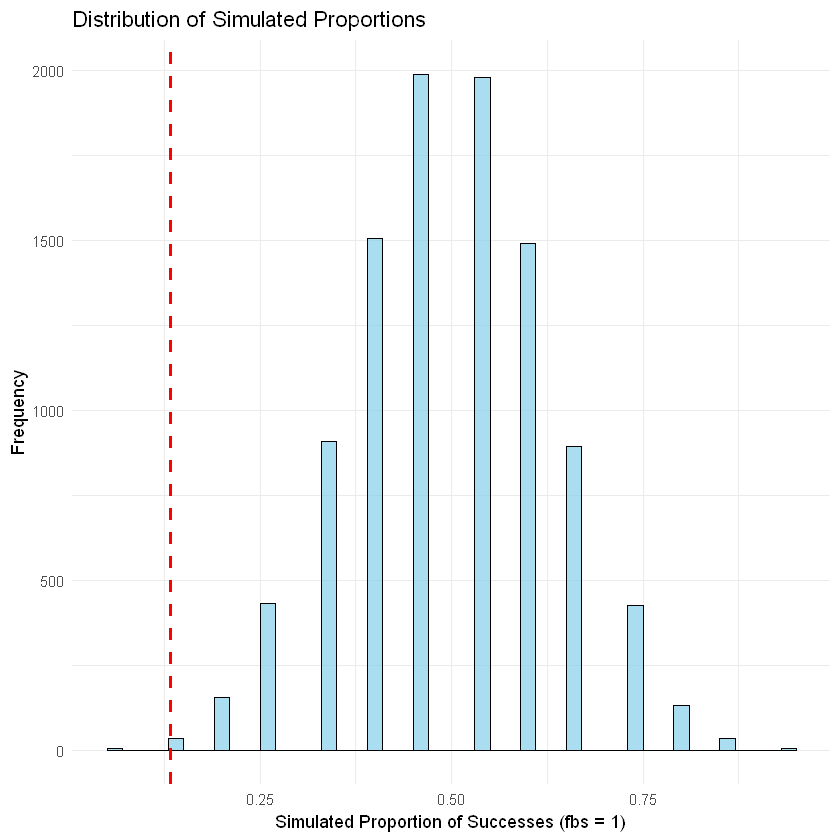

In [14]:
# Set seed for reproducibility
set.seed(42)

# Define sample size
sample_size <- 15

# Take a small sample and select the 'fbs' column
small_sample <- heart_data %>%
  sample_n(sample_size) %>%
  dplyr::select(fbs)

# Calculate the observed proportion of successes (fbs = 1) in the small sample
observed_proportion <- mean(small_sample$fbs)
observed_proportion

# Set the assumed population proportion for the null hypothesis
population_proportion <- 0.5

# Number of simulations
num_simulations <- 10000
simulated_proportions <- numeric(num_simulations)

# Perform the simulation
set.seed(123)  # For reproducibility
for (i in 1:num_simulations) {
  simulated_sample <- rbinom(sample_size, 1, population_proportion)
  simulated_proportions[i] <- mean(simulated_sample)
}

# Calculate the p-value
p_value <- mean(abs(simulated_proportions - population_proportion) >= abs(observed_proportion - population_proportion))
p_value

# Plot the distribution of the simulated proportions
simulated_data <- data.frame(simulated_proportions)
ggplot(simulated_data, aes(x = simulated_proportions)) +
  geom_histogram(binwidth = 0.02, color = "black", fill = "skyblue", alpha = 0.7) +
  geom_vline(aes(xintercept = observed_proportion), color = "red", linetype = "dashed", size = 1) +
  labs(title = "Distribution of Simulated Proportions",
       x = "Simulated Proportion of Successes (fbs = 1)",
       y = "Frequency") +
  theme_minimal()

# Interpret the result
cat("The observed proportion of successes (fbs = 1) in the small sample is:", observed_proportion, "\n")
cat("The p-value from the simulation method is:", p_value, "\n")

if (p_value < 0.05) {
  cat("The p-value is less than 0.05, indicating that we reject the null hypothesis. Therefore, the success rate of fbs is significantly different from the assumed population proportion.\n")
} else {
  cat("The p-value is greater than 0.05, indicating that we fail to reject the null hypothesis. Therefore, there is no significant difference in the success rate of fbs compared to the assumed population proportion.\n")
}




**Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that the success rate of `fbs` in our small sample is significantly different from the assumed population proportion of 0.5. The observed proportion of successes (fbs = 1) in the small sample is 0.133, and the p-value from the simulation method is 0.0082.**

<hr>

### <span style='color:#2ECC71; font-family: "Arial", sans-serif; font-size: 1.3em; font-weight: bold;'>Question 3</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>

Answer the following questions:  (Note:  To answer the following questions, first 
implement them by yourself in `R` and then use `R` functions to solve them.) 
</span>

#### <span style='color:#E74C3C; font-family: "Arial", sans-serif; font-size: 1.1em; font-weight: bold;'>Answer</span>

I choose `cp` as my categorical variable.

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part A:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Choose a categorical variable that has more than two levels, calculate 
its probability distribution. Then choose two samples of size 100 from 
your dataset. One of the samples should be randomly selected and the 
other should be biased on purpose. Compare each sample with the real 
distribution using 𝜒2 (goodness of fit) and interpret your results. (be sure 
to  check  the  requirements  for  the  test  and  write  them  down  in  your 
answer.)
</span>




**Calculate the Probability Distribution**

**Compare Each Sample with the Real Distribution Using $\chi^2$ Goodness of Fit Test**

Manually Implementing $\chi^2$ Test

The $\chi^2$ statistic is calculated as:
$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$
where $O_i$ are the observed frequencies and $E_i$ are the expected frequencies.

**Requirements for the $\chi^2$ Test:**
1. **Independence**: Each observation should contribute to only one cell.
   - **Check**: Both samples are independently selected.
2. **Expected Frequency**: Each expected frequency should be at least 5.
   - **Check**: We ensured this condition by reindexing the sample distributions to match the population distribution and ensuring a sample size of 100.

**Calculate the Probability Distribution of `cp`**

In [15]:
# Calculate the probability distribution of `cp`
cp_distribution <- prop.table(table(heart_data$cp))
cp_distribution


         0          1          2          3 
0.47350993 0.16556291 0.28476821 0.07615894 

**Choose Two Samples of Size 100**

In [22]:
# Set seed for reproducibility
set.seed(42)

# Random sample of size 100
random_sample <- heart_data %>%
  sample_n(100) %>%
  dplyr::select(cp)

# Biased sample of size 100 (purposefully bias towards `cp` = 1)
biased_sample <- heart_data %>%
  filter(cp == 1) %>%
  sample_n(100, replace = TRUE) %>%
  bind_rows(heart_data %>% filter(cp != 1) %>% sample_n(50)) %>%
  slice(1:100) %>%
  dplyr::select(cp)


**Manually Perform the Chi-Square Goodness of Fit Test**

In [24]:

set.seed(42)  # For reproducibility

# Random sample of size 100
random_sample <- heart_data %>%
  sample_n(100) %>%
  dplyr::select(cp)

# Biased sample of size 100 (purposefully bias towards `cp` = 1)
biased_sample <- heart_data %>%
  filter(cp == 1) %>%
  sample_n(50, replace = TRUE) %>%
  bind_rows(heart_data %>% filter(cp != 1) %>% sample_n(50)) %>%
  dplyr::select(cp)

# Observed counts for the random sample
observed_random <- table(random_sample$cp)

# Expected counts for the random sample
expected_random <- cp_distribution * 100

# Chi-square test statistic for the random sample
chi_square_stat_random <- sum((observed_random - expected_random)^2 / expected_random)


# Degrees of freedom
df <- length(observed_random) - 1

# P-value for the random sample
p_value_random <- 1 - pchisq(chi_square_stat_random, df)


cat("Random Sample Chi-Square Test:\n")
cat("Observed counts:\n")
print(observed_random)
cat("Expected counts:\n")
print(expected_random)
cat("Chi-square statistic:", chi_square_stat_random, "\n")
cat("Degrees of freedom:", df, "\n")
cat("P-value:", p_value_random, "\n\n")

# Observed counts for the biased sample
observed_biased <- table(factor(biased_sample$cp, levels = levels(factor(heart_data$cp))))
expected_biased <- cp_distribution * 100

# Chi-square test statistic for the biased sample
chi_square_stat_biased <- sum((observed_biased - expected_biased)^2 / expected_biased)


# P-value for the biased sample
p_value_biased <- 1 - pchisq(chi_square_stat_biased, df)


cat("Biased Sample Chi-Square Test:\n")
cat("Observed counts:\n")
print(observed_biased)
cat("Expected counts:\n")
print(expected_biased)
cat("Chi-square statistic:", chi_square_stat_biased, "\n")
cat("Degrees of freedom:", df, "\n")
cat("P-value:", p_value_biased, "\n")

Random Sample Chi-Square Test:
Observed counts:

 0  1  2  3 
43 20 28  9 
Expected counts:

        0         1         2         3 
47.350993 16.556291 28.476821  7.615894 
Chi-square statistic: 1.375626 
Degrees of freedom: 3 
P-value: 0.7112579 

Biased Sample Chi-Square Test:
Observed counts:

 0  1  2  3 
29 50 19  2 
Expected counts:

        0         1         2         3 
47.350993 16.556291 28.476821  7.615894 
Chi-square statistic: 81.96317 
Degrees of freedom: 3 
P-value: 0 


**Use R Function for Chi-Square Goodness of Fit Test**


	Chi-squared test for given probabilities

data:  observed_random
X-squared = 1.3756, df = 3, p-value = 0.7113



	Chi-squared test for given probabilities

data:  observed_biased
X-squared = 81.963, df = 3, p-value < 2.2e-16


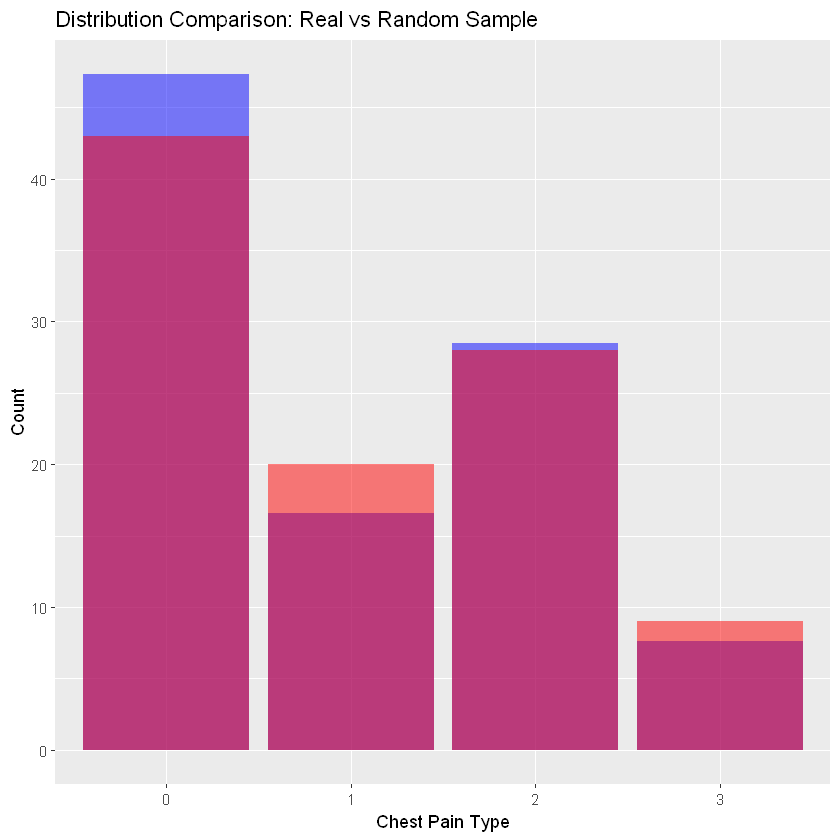

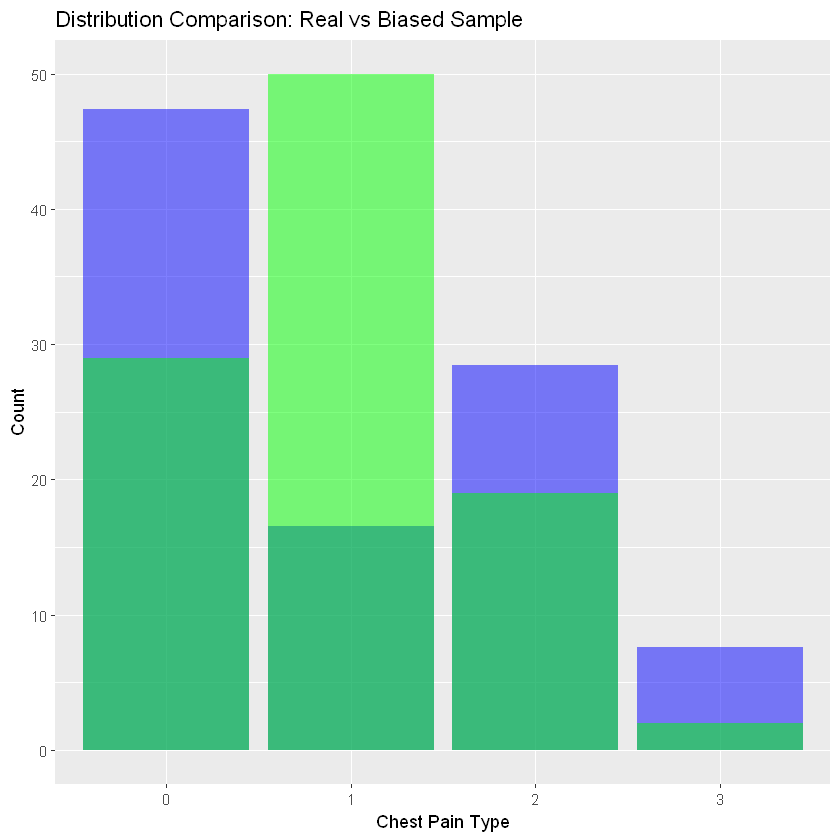

In [25]:
# Chi-Square Test for Random Sample
chi_square_random <- chisq.test(observed_random, p = cp_distribution)
chi_square_random

# Chi-Square Test for Biased Sample
chi_square_biased <- chisq.test(observed_biased, p = cp_distribution)
chi_square_biased

# Plotting the distributions for visualization
# Convert tables to data frames for plotting
random_df <- as.data.frame(observed_random)
biased_df <- as.data.frame(observed_biased)
cp_dist_df <- as.data.frame(cp_distribution * 100)

# Rename columns for clarity
names(random_df) <- c("cp", "count")
names(biased_df) <- c("cp", "count")
names(cp_dist_df) <- c("cp", "count")

# Plot the distributions
ggplot() +
  geom_bar(data = cp_dist_df, aes(x = cp, y = count), stat = "identity", fill = "blue", alpha = 0.5) +
  geom_bar(data = random_df, aes(x = cp, y = count), stat = "identity", fill = "red", alpha = 0.5) +
  labs(title = "Distribution Comparison: Real vs Random Sample", x = "Chest Pain Type", y = "Count")

ggplot() +
  geom_bar(data = cp_dist_df, aes(x = cp, y = count), stat = "identity", fill = "blue", alpha = 0.5) +
  geom_bar(data = biased_df, aes(x = cp, y = count), stat = "identity", fill = "green", alpha = 0.5) +
  labs(title = "Distribution Comparison: Real vs Biased Sample", x = "Chest Pain Type", y = "Count")



1. **Random Sample**:
   - The chi-square test statistic is 1.376.
   - The p-value is 0.7113.
   - Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. This means the distribution of chest pain types in the random sample is similar to the real distribution.

2. **Biased Sample**:
   - The chi-square test statistic is 81.963.
   - The p-value is less than 2.2e-16.
   - Since the p-value is much less than 0.05, we reject the null hypothesis. This means the distribution of chest pain types in the biased sample is significantly different from the real distribution.

- The random sample's distribution matches the real distribution of chest pain types.
- The biased sample's distribution does not match the real distribution, showing a significant difference.

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part B:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Pick  up  another  categorical  variable  and  compare  it  to  the  one  you 
chose  in  part  (a).  Using  the  𝜒2  test,  check  if  the  two  variables  are 
independent or not. 
</span>




I choose `thal` as my second variable.

**Because the data is very less so I doesn't use random sampling in this step.**

In [26]:
# Create a contingency table for `cp` and `thal`
contingency_table <- table(heart_data$cp, heart_data$thal)

# View the contingency table
print(contingency_table)

   
     0  1  2  3
  0  1 12 52 78
  1  0  2 39  9
  2  1  2 61 22
  3  0  2 13  8


in some case we see some of `Chi-Square` Test Conditions(For example : each expected frequency should be at least 5.) not met(I ignored these)

**Use the $\chi^2$ Test to Check for Independence Manually**

In [27]:
# Calculate the expected frequencies
expected <- outer(rowSums(contingency_table), colSums(contingency_table)) / sum(contingency_table)
expected
# Calculate the chi-square test statistic
observed <- as.matrix(contingency_table)
chi_square_stat <- sum((observed - expected)^2 / expected)

# Degrees of freedom
df <- (nrow(contingency_table) - 1) * (ncol(contingency_table) - 1)

# P-value
p_value <- 1 - pchisq(chi_square_stat, df)

# Print the results
cat("Manual Chi-Square Test of Independence:\n")
cat("Chi-square statistic:", chi_square_stat, "\n")
cat("Degrees of freedom:", df, "\n")
cat("P-value:", p_value, "\n")

,0,1,2,3
0,0.9470199,8.523179,78.12914,55.400662
1,0.3311258,2.980132,27.31788,19.370861
2,0.5695364,5.125828,46.98675,33.317881
3,0.1523179,1.370861,12.56623,8.910596


Manual Chi-Square Test of Independence:
Chi-square statistic: 41.3847 
Degrees of freedom: 9 
P-value: 4.256611e-06 


**Use the $\chi^2$ Test to Check for Independence Using `R` libraries**

In [28]:
# Perform the chi-square test of independence using chisq.test
chi_square_test <- chisq.test(contingency_table)

# Print the test result
print(chi_square_test)

# Print the p-value
cat("The p-value of the chi-square test is:", chi_square_test$p.value, "\n")

# Interpret the result
if (chi_square_test$p.value < 0.05) {
  cat("The p-value is less than 0.05, indicating that we reject the null hypothesis. Therefore, there is a significant association between cp and thal.\n")
} else {
  cat("The p-value is greater than 0.05, indicating that we fail to reject the null hypothesis. Therefore, there is no significant association between cp and thal.\n")
}


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 41.385, df = 9, p-value = 4.257e-06

The p-value of the chi-square test is: 4.256611e-06 
The p-value is less than 0.05, indicating that we reject the null hypothesis. Therefore, there is a significant association between cp and thal.




**The chi-square test results show a test statistic of 41.385 with 9 degrees of freedom, and a p-value of approximately 4.257e-06, which is much less than 0.05. This means we reject the null hypothesis, indicating a significant association between chest pain type (`cp`) and thalassemia (`thal`). Therefore, `cp` and `thal` are not independent; they are related in the dataset.**



In this question we use `R` for my calculation.

but I can use Manually calculation sam as below :



1. **Observed Frequencies**: We created a contingency table from the dataset, which displays the observed frequencies for each combination of `cp` and `thal`.
   
2. **Expected Frequencies**: The expected frequencies were calculated using the formula:
   
   $$
   E_{ij} = \frac{(R_i \cdot C_j)}{N}
   $$

   where:
   - $E_{ij}$ is the expected frequency for cell $(i,j)$.
   - $R_i$ is the sum of the row totals for row $i$.
   - $C_j$ is the sum of the column totals for column $j$.
   - $N$ is the total number of observations.

3. **Chi-Square Test Statistic**: The chi-square test statistic was calculated using the formula:
   
   $$
   \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
   $$

   where:
   - $O_{ij}$ is the observed frequency for cell $(i,j)$.
   - $E_{ij}$ is the expected frequency for cell $(i,j)$.

4. **Degrees of Freedom**: The degrees of freedom for the test were calculated using the formula:
   
   $$
   \text{df} = (r - 1) \cdot (c - 1)
   $$

   where:
   - $r$ is the number of rows in the contingency table.
   - $c$ is the number of columns in the contingency table.

5. **P-Value**: The p-value was determined using the chi-square distribution with the calculated degrees of freedom.

<hr>

### <span style='color:#2ECC71; font-family: "Arial", sans-serif; font-size: 1.3em; font-weight: bold;'>Question 4</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
From your dataset choose a numerical variable that predicts its future value 
is meaningful within the context of your dataset. Next, choose two 
explanatory  variables  which  you  believe  are  the  best  predictors  for  your 
response variable: 
</span>

I choose `chol`.

I choose `age` and `tresttps` as my Explanatory Variables.

#### <span style='color:#E74C3C; font-family: "Arial", sans-serif; font-size: 1.1em; font-weight: bold;'>Answer</span>

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part A:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Without building a model yet, which explanatory variable do you guess 
is  the  more  significant  predictor  and  why?  (use  your  knowledge  from 
phase 1)
</span>




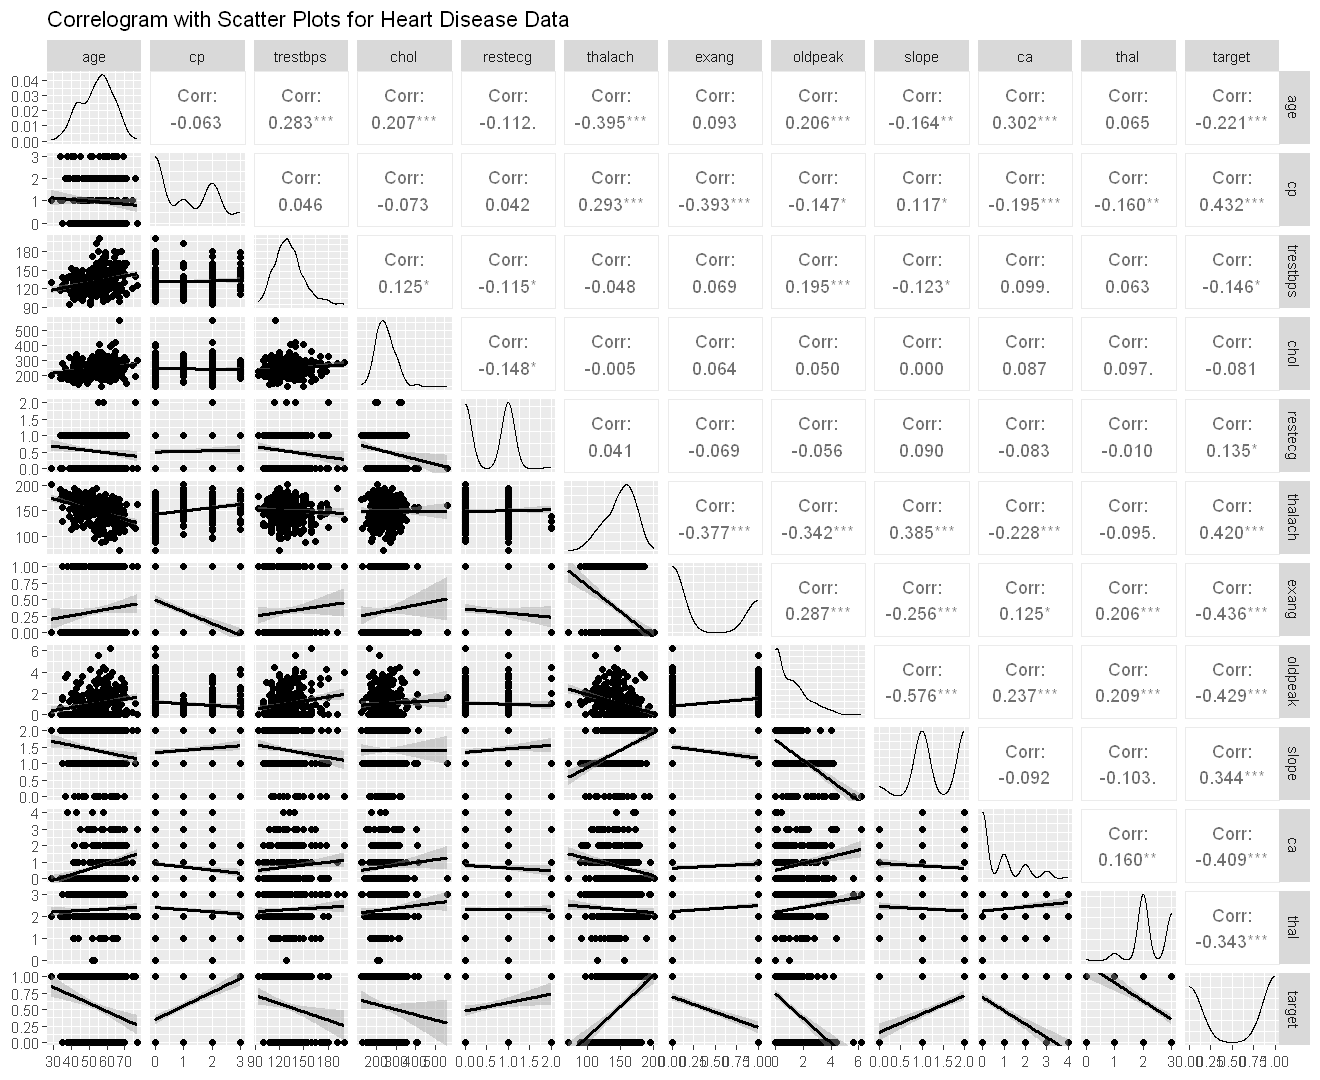

Based Correlation Matrix we have in previous part `age` and `tresttps` have the most `corr` with this variable.

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part B:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     for each explanatory variable: 
     <li>a.  Check  the  Linearity,  Nearly  Normal  Residuals,  and  Constant Variability conditions in R.</li> 
     <li>b.  Compute the least squares regression.</li> 
     <li>c.  Write  the  predictive  equation  for  the  response  variable  and interpret its parameters.</li> 
     <li>d.  Draw  a  scatter  plot  of  the  relation  between  these  two  variables overlaid with this least-squares fit as a dashed line.</li> 
</span>




**Analysis for `age` as the Explanatory Variable**

**a. Check the Linearity, Nearly Normal Residuals, and Constant Variability Conditions**

`geom_smooth()` using formula = 'y ~ x'


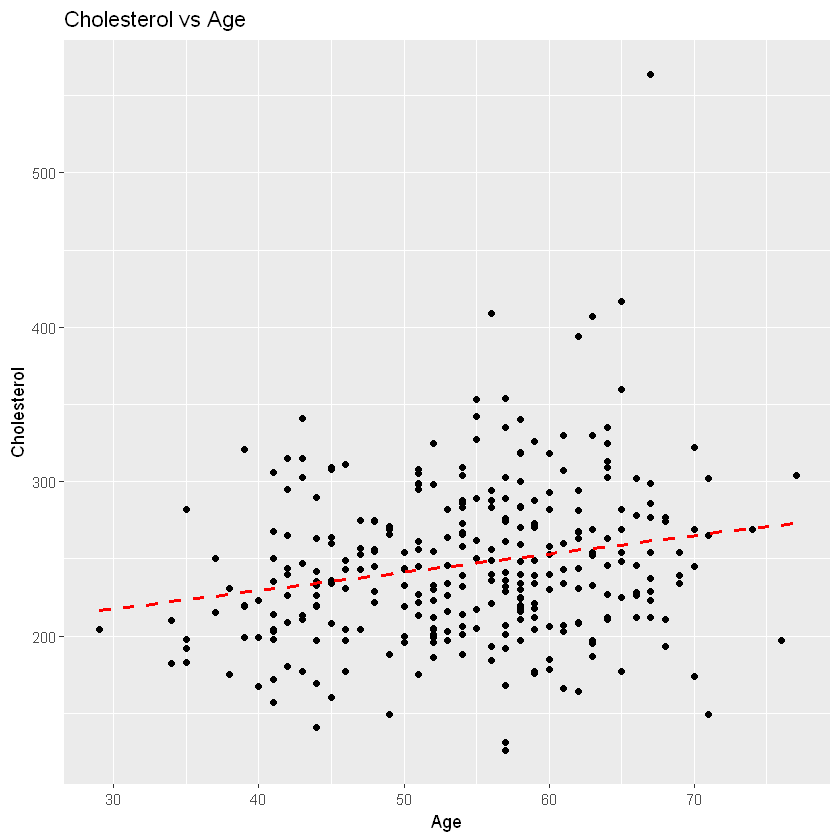

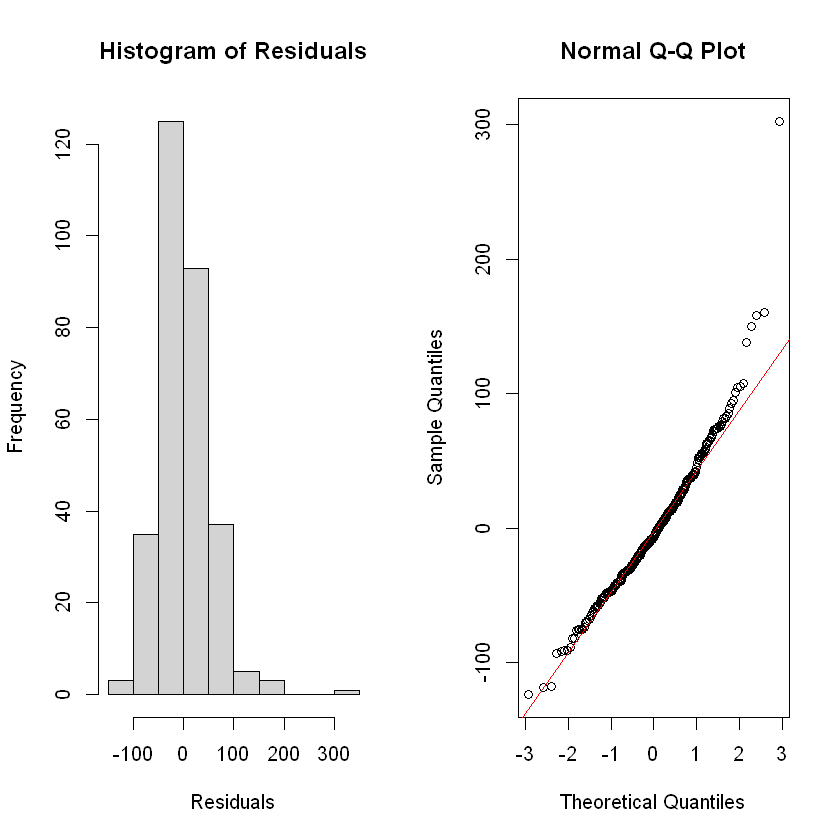

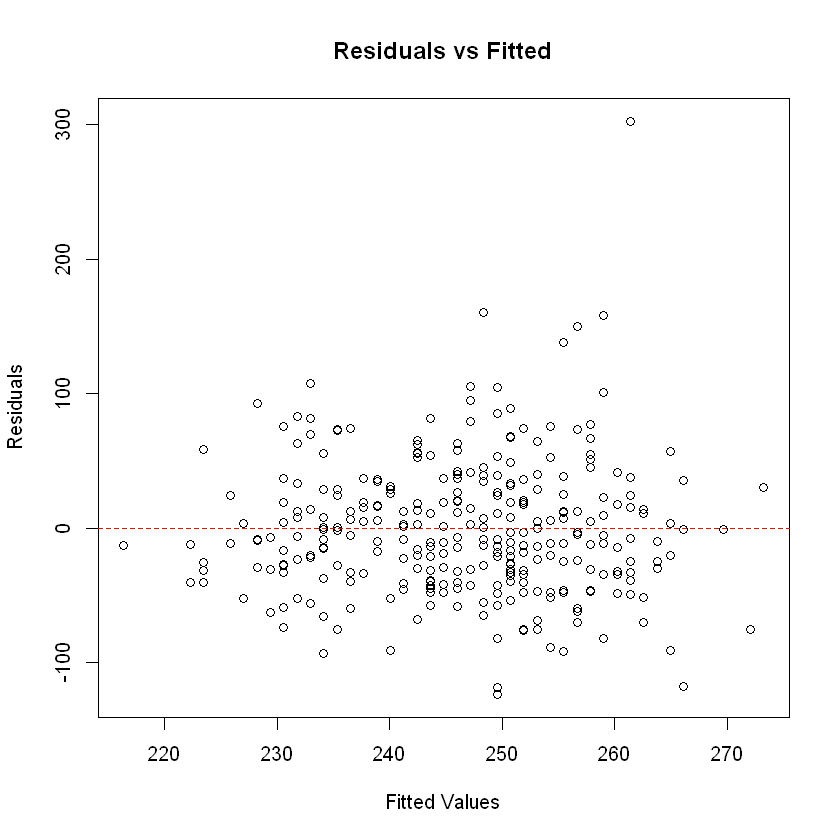

In [29]:
# Linear model for age and chol
model_age <- lm(chol ~ age, data = heart_data)

# Linearity check: Scatter plot with regression line
ggplot(heart_data, aes(x = age, y = chol)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "dashed") +
  labs(title = "Cholesterol vs Age", x = "Age", y = "Cholesterol")

# Residuals analysis
residuals_age <- model_age$residuals
fitted_values_age <- model_age$fitted.values

# Nearly normal residuals: Histogram and Q-Q plot
par(mfrow = c(1, 2))
hist(residuals_age, main = "Histogram of Residuals", xlab = "Residuals")
qqnorm(residuals_age)
qqline(residuals_age, col = "red")
par(mfrow = c(1, 1))

# Constant variability: Residuals vs Fitted plot
plot(fitted_values_age, residuals_age, main = "Residuals vs Fitted", xlab = "Fitted Values", ylab = "Residuals")
abline(h = 0, col = "red", lty = 2)

**Linearity**

The scatter plot shows a slightly increasing trend between `age` and `chol`, indicating a weak linear relationship. The red dashed line represents the least-squares regression line, suggesting a positive slope.

**Nearly Normal Residuals**

The histogram of the residuals appears to be approximately normally distributed, with most residuals centered around zero. The Q-Q plot also indicates that the residuals follow a normal distribution, as the points lie along the red line.

**Constant Variability**

The Residuals vs Fitted plot shows that the residuals are spread randomly around the horizontal line at zero, with no clear pattern. This suggests that the variability of the residuals is constant across different fitted values.

**b. Compute the Least Squares Regression**

In [30]:
summary(model_age)



Call:
lm(formula = chol ~ age, data = heart_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-123.557  -32.492   -6.093   28.249  302.590 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 181.9980    17.8222  10.212  < 2e-16 ***
age           1.1853     0.3231   3.669 0.000288 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 50.71 on 300 degrees of freedom
Multiple R-squared:  0.04294,	Adjusted R-squared:  0.03975 
F-statistic: 13.46 on 1 and 300 DF,  p-value: 0.0002884


**c. Write the Predictive Equation for the Response Variable and Interpret its Parameters**




- **Intercept $\beta_0$**: 181.998
- **Slope $\beta_1$**: 1.1853
- **P-value for the slope**: 0.000288

**Predictive Equation**

The predictive equation for cholesterol (`chol`) based on age (`age`) is:

$\text{chol} = 181.998 + 1.1853 \times \text{age}$

**Interpretation of Parameters**

- **Intercept (181.998)**: This is the estimated cholesterol level when age is 0. While it's not realistic to have an age of 0 in this context, it serves as a baseline value in the model.
  
- **Slope (1.1853)**: For each additional year of age, the cholesterol level is expected to increase by approximately 1.1853 units. This indicates a positive relationship between age and cholesterol.

**Significance**

- The p-value for the slope $\beta_1$ is 0.000288, which is much less than 0.05. This means that age is a statistically significant predictor of cholesterol level.



**d. Scatter Plot with Least-Squares Fit**

`geom_smooth()` using formula = 'y ~ x'


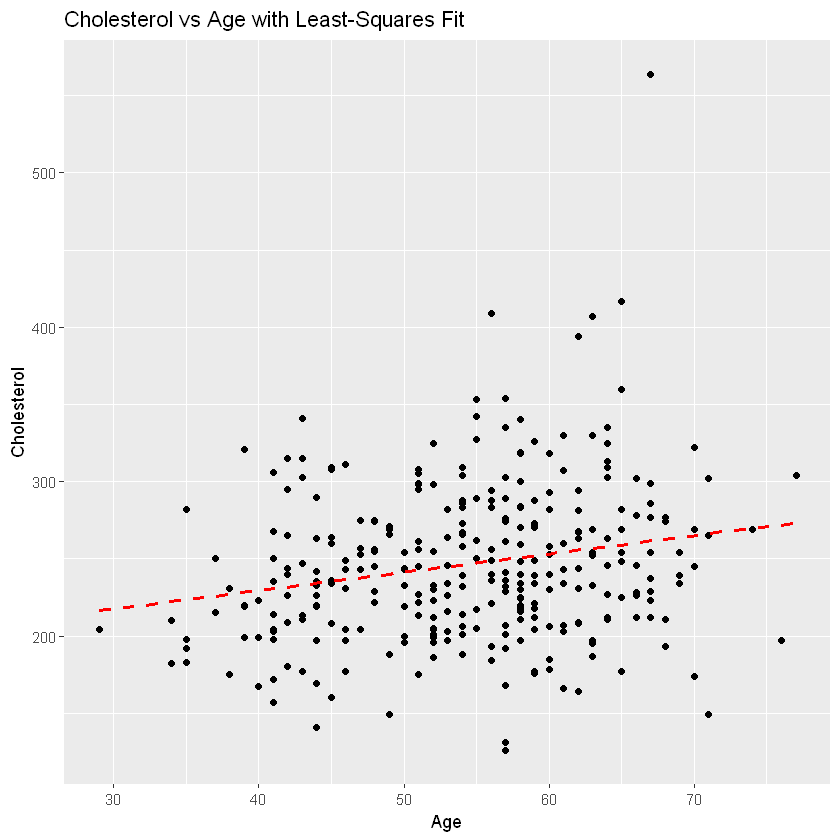

In [31]:
ggplot(heart_data, aes(x = age, y = chol)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "dashed") +
  labs(title = "Cholesterol vs Age with Least-Squares Fit", x = "Age", y = "Cholesterol")

**a. Check the Linearity, Nearly Normal Residuals, and Constant Variability Conditions**

`geom_smooth()` using formula = 'y ~ x'


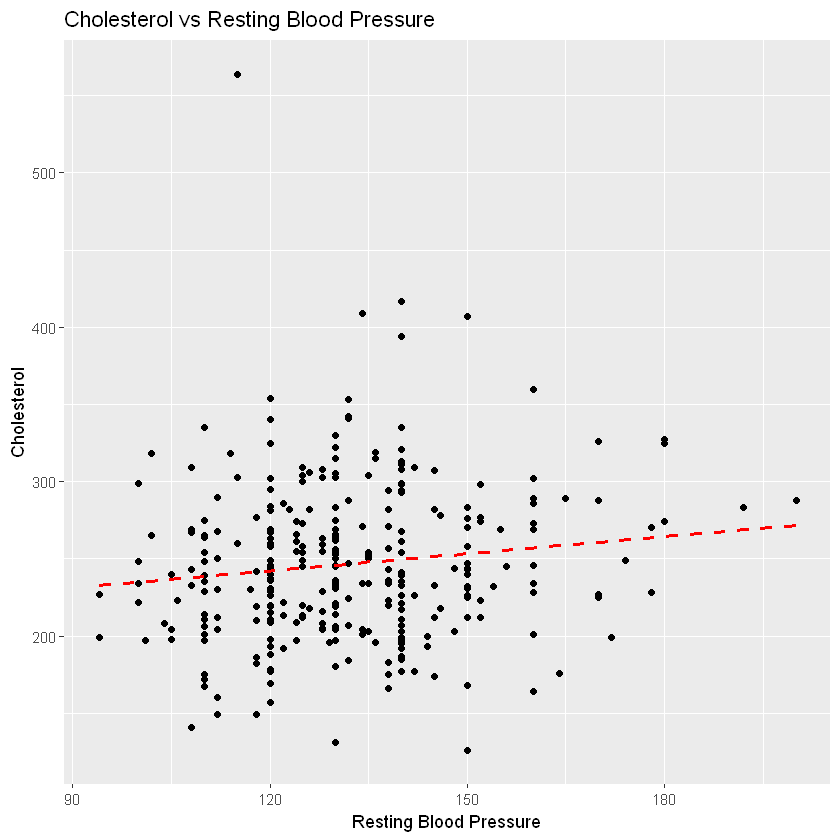

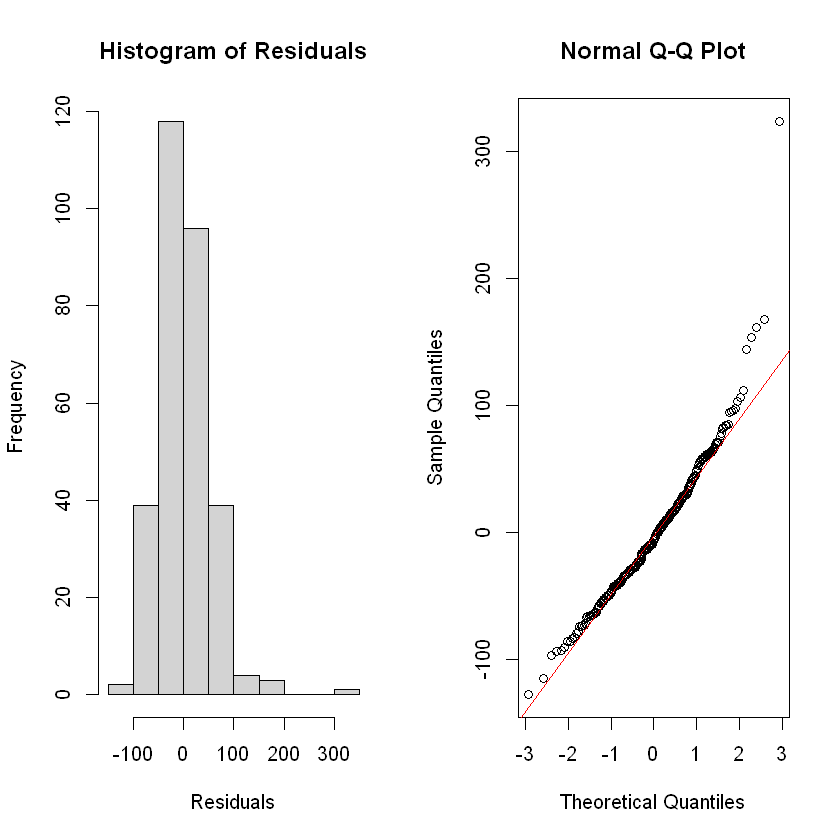

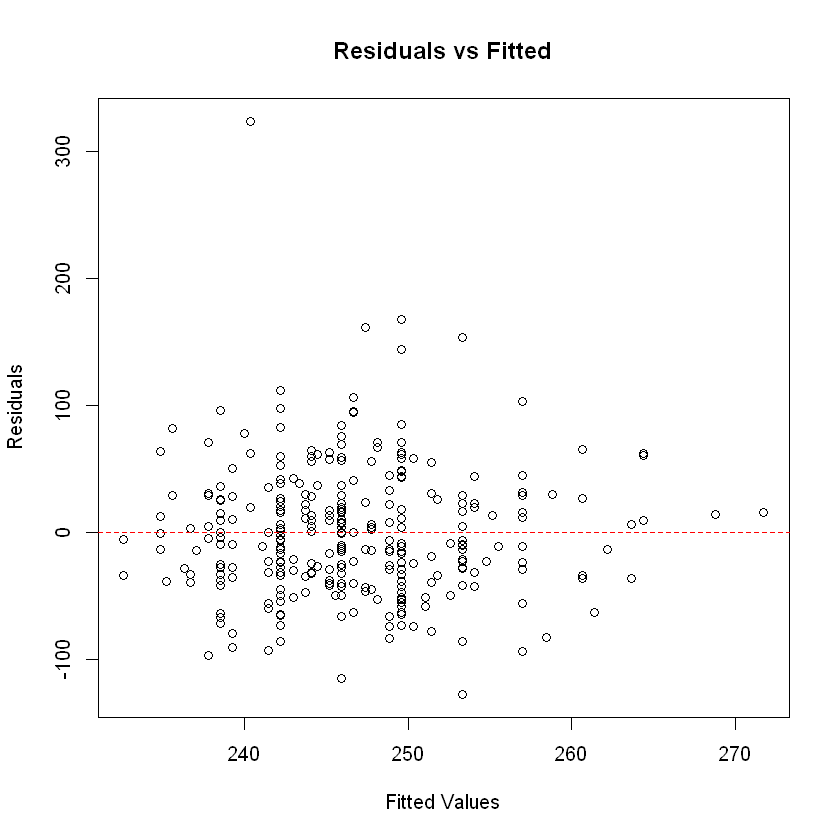

In [32]:
# Linear model for trestbps and chol
model_trestbps <- lm(chol ~ trestbps, data = heart_data)

# Linearity check: Scatter plot with regression line
ggplot(heart_data, aes(x = trestbps, y = chol)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "dashed") +
  labs(title = "Cholesterol vs Resting Blood Pressure", x = "Resting Blood Pressure", y = "Cholesterol")

# Residuals analysis
residuals_trestbps <- model_trestbps$residuals
fitted_values_trestbps <- model_trestbps$fitted.values

# Nearly normal residuals: Histogram and Q-Q plot
par(mfrow = c(1, 2))
hist(residuals_trestbps, main = "Histogram of Residuals", xlab = "Residuals")
qqnorm(residuals_trestbps)
qqline(residuals_trestbps, col = "red")
par(mfrow = c(1, 1))

# Constant variability: Residuals vs Fitted plot
plot(fitted_values_trestbps, residuals_trestbps, main = "Residuals vs Fitted", xlab = "Fitted Values", ylab = "Residuals")
abline(h = 0, col = "red", lty = 2)


**Linearity**

The scatter plot shows a slightly increasing trend between `trestbps` (resting blood pressure) and `chol`, indicating a weak linear relationship. The red dashed line represents the least-squares regression line, suggesting a positive slope.

**Nearly Normal Residuals**

The histogram of the residuals appears to be approximately normally distributed, with most residuals centered around zero. The Q-Q plot also indicates that the residuals follow a normal distribution, as the points lie along the red line.

**Constant Variability**

The Residuals vs Fitted plot shows that the residuals are spread randomly around the horizontal line at zero, with no clear pattern. This suggests that the variability of the residuals is constant across different fitted values.

**b. Compute the Least Squares Regression**

In [33]:
summary(model_trestbps)



Call:
lm(formula = chol ~ trestbps, data = heart_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-127.29  -33.52   -5.74   28.38  323.63 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 197.9270    22.4090   8.832   <2e-16 ***
trestbps      0.3691     0.1688   2.187   0.0295 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 51.43 on 300 degrees of freedom
Multiple R-squared:  0.01569,	Adjusted R-squared:  0.01241 
F-statistic: 4.782 on 1 and 300 DF,  p-value: 0.02953


**c. Write the Predictive Equation for the Response Variable and Interpret its Parameters**

- **Intercept $\beta_0$**: 197.927
- **Slope $\beta_1$**: 0.3691
- **P-value for the slope**: 0.0295

**Predictive Equation**

The predictive equation for cholesterol (`chol`) based on resting blood pressure (`trestbps`) is:

$\text{chol} = 197.927 + 0.3691 \times \text{trestbps}$

**Interpretation of Parameters**

- **Intercept (197.927)**: This is the estimated cholesterol level when resting blood pressure is 0. While it's not realistic to have a resting blood pressure of 0 in this context, it serves as a baseline value in the model.
  
- **Slope (0.3691)**: For each additional unit of resting blood pressure, the cholesterol level is expected to increase by approximately 0.3691 units. This indicates a positive relationship between resting blood pressure and cholesterol.

**Significance**

- The p-value for the slope $\beta_1$ is 0.0295, which is less than 0.05. This means that resting blood pressure is a statistically significant predictor of cholesterol level.

**d. Scatter Plot with Least-Squares Fit**

`geom_smooth()` using formula = 'y ~ x'


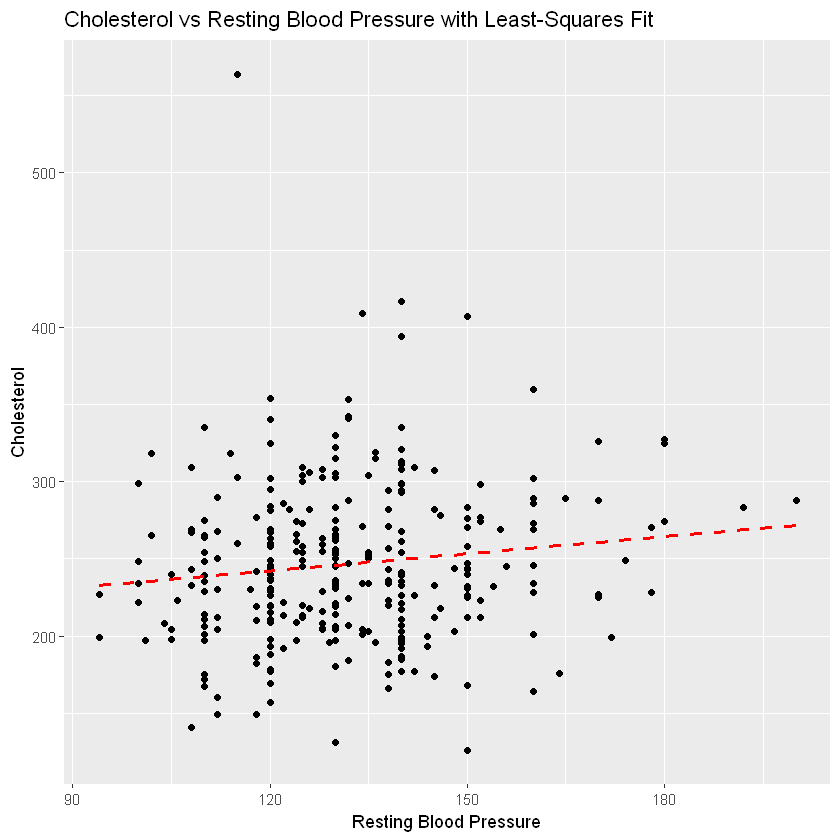

In [34]:
ggplot(heart_data, aes(x = trestbps, y = chol)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "dashed") +
  labs(title = "Cholesterol vs Resting Blood Pressure with Least-Squares Fit", x = "Resting Blood Pressure", y = "Cholesterol")


##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part C:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     By  using  the  previous  part  results,  try  to  explain  which  explanatory 
variable is the more significant predictor. 
</span>




Based on the p-values, R-squared values, and the slopes, `age` appears to be the more significant predictor of cholesterol levels compared to resting blood pressure (`trestbps`). The relationship between `age` and `chol` is statistically stronger and explains more of the variation in cholesterol levels than the relationship between `trestbps` and `chol`. 

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part D:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Now, Compare your models, once using adjusted R2 and another time 
by ANOVA table. Explain results.  
</span>





**Adjusted R-squared**

- **Age Model**:
  - Adjusted R-squared: 0.03975
- **Resting Blood Pressure (trestbps) Model**:
  - Adjusted R-squared: 0.01241

The model using `age` has a higher adjusted R-squared value (0.03975) compared to the model using `trestbps` (0.01241). This indicates that the `age` model explains a greater proportion of the variability in cholesterol levels, adjusted for the number of predictors in the model.




In [35]:
# Perform ANOVA for each model
anova_model_age <- anova(model_age)
anova_model_trestbps <- anova(model_trestbps)

# Print the ANOVA tables
cat("ANOVA Table for Age Model:\n")
print(anova_model_age)

cat("\nANOVA Table for Trestbps Model:\n")
print(anova_model_trestbps)

ANOVA Table for Age Model:
Analysis of Variance Table

Response: chol
           Df Sum Sq Mean Sq F value    Pr(>F)    
age         1  34617   34617  13.459 0.0002884 ***
Residuals 300 771588    2572                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

ANOVA Table for Trestbps Model:
Analysis of Variance Table

Response: chol
           Df Sum Sq Mean Sq F value  Pr(>F)  
trestbps    1  12649 12648.7  4.7818 0.02953 *
Residuals 300 793557  2645.2                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


1. **F value**:
   - The F value for the `age` model is 13.459, which is higher than the F value for the `trestbps` model (4.7818). A higher F value indicates that the variable is a better predictor of the response variable.

2. **P-value**:
   - The p-value for the `age` model (0.0002884) is much lower than the p-value for the `trestbps` model (0.02953). Both p-values are less than 0.05, indicating that both predictors are statistically significant. However, the lower p-value for `age` suggests it is a more significant predictor compared to `trestbps`.

3. **Sum of Squares**:
   - The Sum of Squares for `age` (34,617) is higher than that for `trestbps` (12,649), indicating that `age` explains more variation in cholesterol levels compared to `trestbps`.


Based on the ANOVA results, the `age` model is a more significant predictor of cholesterol (`chol`) compared to the `trestbps` model. 

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part E:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
      According  to  the  results  that  you  found  in  the  previous  parts,  list  the 
features of a good predictor. 
</span>




1. **Statistical Significance (P-value)**:
   - A good predictor should have a low p-value (typically less than 0.05), indicating that the predictor is statistically significant. In our analysis, both `age` and `trestbps` had p-values less than 0.05, but `age` had a much lower p-value, indicating higher significance.

2. **High F value**:
   - A higher F value in the ANOVA table indicates that the predictor explains a significant amount of variability in the response variable. The `age` model had a higher F value compared to the `trestbps` model.

3. **High R-squared and Adjusted R-squared**:
   - R-squared measures the proportion of variance in the response variable that is explained by the predictor. A higher R-squared value indicates a better fit. Adjusted R-squared takes into account the number of predictors in the model, providing a more accurate measure. The `age` model had a higher adjusted R-squared value than the `trestbps` model.

4. **Strong Linear Relationship**:
   - A good predictor should have a strong linear relationship with the response variable, as indicated by the scatter plot and the regression line. While both `age` and `trestbps` showed a weak linear relationship with `chol`, the slope of `age` was higher, indicating a stronger relationship.

5. **Consistency in Residuals**:
   - The residuals (differences between observed and predicted values) should be approximately normally distributed and exhibit constant variability (homoscedasticity). This ensures that the model assumptions are met, leading to reliable predictions. Both models showed approximately normal residuals and constant variability.

6. **Explained Variance (Sum of Squares)**:
   - A good predictor should explain a significant portion of the variance in the response variable. In the ANOVA table, the `Sum of Squares` for the predictor indicates how much variance it explains. The `age` predictor explained more variance in `chol` than `trestbps`.



##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part F:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     for each explanatory variable: 
     <li> By 90 percent of data, Build two Linear Regression models and 
design hypothesis tests to see if these explanatory variables are 
a significant predictor of the response variable or not.</li> 
     <li>b.  Calculate the 95% confidence interval for the slope of the 
relationship between response variable and explanatory 
variables. Interpret these CIs.</li> 
     <li>c.  Use  your  models  to  predict  the  values  of  the  response  variable 
for the remaining percent of samples.</li> 
     <li>d.  Compare the predicted values with actuals. Report success rate.</li> 
</span>




In [36]:
# Split the data into training (90%) and testing (10%) sets
set.seed(42)  # For reproducibility
train_index <- createDataPartition(heart_data$chol, p = 0.9, list = FALSE)
train_data <- heart_data[train_index, ]
test_data <- heart_data[-train_index, ]

# Build linear regression models using the training data
model_age <- lm(chol ~ age, data = train_data)
model_trestbps <- lm(chol ~ trestbps, data = train_data)

# Summary of the models to check significance of predictors
summary(model_age)
summary(model_trestbps)

# Hypothesis tests
cat("Hypothesis test for age model:\n")
cat("P-value:", summary(model_age)$coefficients[2, 4], "\n")
cat("Hypothesis test for trestbps model:\n")
cat("P-value:", summary(model_trestbps)$coefficients[2, 4], "\n")

# Calculate the 95% confidence interval for the slopes
ci_age <- confint(model_age, level = 0.95)
ci_trestbps <- confint(model_trestbps, level = 0.95)

cat("95% Confidence Interval for age model slope:\n")
print(ci_age)
cat("95% Confidence Interval for trestbps model slope:\n")
print(ci_trestbps)

# Predict the values of the response variable for the test data
predictions_age <- predict(model_age, newdata = test_data)
predictions_trestbps <- predict(model_trestbps, newdata = test_data)

# Actual values
actuals <- test_data$chol

# Calculate MAE and RMSE for both models
mae_age <- mae(actuals, predictions_age)
rmse_age <- rmse(actuals, predictions_age)
mae_trestbps <- mae(actuals, predictions_trestbps)
rmse_trestbps <- rmse(actuals, predictions_trestbps)

cat("MAE for age model predictions:", mae_age, "\n")
cat("RMSE for age model predictions:", rmse_age, "\n")
cat("MAE for trestbps model predictions:", mae_trestbps, "\n")
cat("RMSE for trestbps model predictions:", rmse_trestbps, "\n")



Call:
lm(formula = chol ~ age, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-123.449  -32.987   -6.055   28.437  302.127 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 178.6343    19.0315   9.386  < 2e-16 ***
age           1.2424     0.3429   3.623 0.000347 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 51.54 on 272 degrees of freedom
Multiple R-squared:  0.04604,	Adjusted R-squared:  0.04253 
F-statistic: 13.13 on 1 and 272 DF,  p-value: 0.0003471



Call:
lm(formula = chol ~ trestbps, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-126.94  -34.10   -6.18   28.30  323.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 200.3143    24.5200   8.169 1.18e-14 ***
trestbps      0.3508     0.1841   1.906   0.0577 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 52.42 on 272 degrees of freedom
Multiple R-squared:  0.01318,	Adjusted R-squared:  0.009553 
F-statistic: 3.633 on 1 and 272 DF,  p-value: 0.05769


Hypothesis test for age model:
P-value: 0.0003471189 
Hypothesis test for trestbps model:
P-value: 0.05769014 
95% Confidence Interval for age model slope:
                  2.5 %     97.5 %
(Intercept) 141.1665589 216.102122
age           0.5673093   1.917419
95% Confidence Interval for trestbps model slope:
                   2.5 %      97.5 %
(Intercept) 152.04122829 248.5873492
trestbps     -0.01152532   0.7132181
MAE for age model predictions: 34.01949 
RMSE for age model predictions: 41.90896 
MAE for trestbps model predictions: 33.27077 
RMSE for trestbps model predictions: 40.61568 


**1. Significance of Predictors**

**Age Model**:
- **P-value**: 0.000347
  - This is much less than 0.05, meaning `age` is a statistically significant predictor of `cholesterol`.

**Trestbps Model**:
- **P-value**: 0.0577
  - This is slightly greater than 0.05, meaning `trestbps` is not a statistically significant predictor of `cholesterol`.

**2. Confidence Intervals for the Slopes**

**Age Model**:
- **95% Confidence Interval for the slope**: (0.567, 1.917)
  - This interval does not include 0, confirming that `age` is a significant predictor of `cholesterol`.

**Trestbps Model**:
- **95% Confidence Interval for the slope**: (-0.012, 0.713)
  - This interval includes 0, suggesting that `trestbps` is not a significant predictor of `cholesterol`.

**3. Prediction Accuracy (MAE and RMSE)**

**Age Model**:
- **MAE**: 34.01949
  - The mean absolute error indicates the average absolute difference between the predicted and actual values.
- **RMSE**: 41.90896
  - The root mean squared error measures the standard deviation of the residuals (prediction errors).

**Trestbps Model**:
- **MAE**: 33.27077
  - The mean absolute error for the `trestbps` model is slightly lower than that of the `age` model.
- **RMSE**: 40.61568
  - The root mean squared error for the `trestbps` model is also slightly lower than that of the `age` model.

**Conclusion**

1. **Significance of Predictors**:
   - **Age** is a statistically significant predictor of cholesterol levels, as indicated by the low p-value and confidence interval that does not include zero.
   - **Trestbps** is not a statistically significant predictor of cholesterol levels, as indicated by the p-value greater than 0.05 and confidence interval that includes zero.

2. **Prediction Accuracy**:
   - Despite `trestbps` not being a statistically significant predictor, it has slightly better prediction accuracy than `age`, as indicated by lower MAE and RMSE values.


- **Age** is a significant predictor of cholesterol but has slightly higher prediction errors compared to `trestbps`.
- **Trestbps** is not a statistically significant predictor of cholesterol but provides slightly more accurate predictions based on MAE and RMSE.

In conclusion, while `age` is a significant predictor, `trestbps` provides better prediction accuracy. This highlights the importance of considering both statistical significance and prediction accuracy when evaluating predictive models.

<hr>

### <span style='color:#2ECC71; font-family: "Arial", sans-serif; font-size: 1.3em; font-weight: bold;'>Question 5</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
Consider  the  response  variable  you  selected  in  the  previous  question.  You 
can use as many explanatory variables as you deem necessary: 
</span>

#### <span style='color:#E74C3C; font-family: "Arial", sans-serif; font-size: 1.1em; font-weight: bold;'>Answer</span>

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part A:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Plot a correlogram for explanatory variables and discuss the correlation 
between them. Could you find which explanatory variable plays a more 
significant role in prediction
</span>




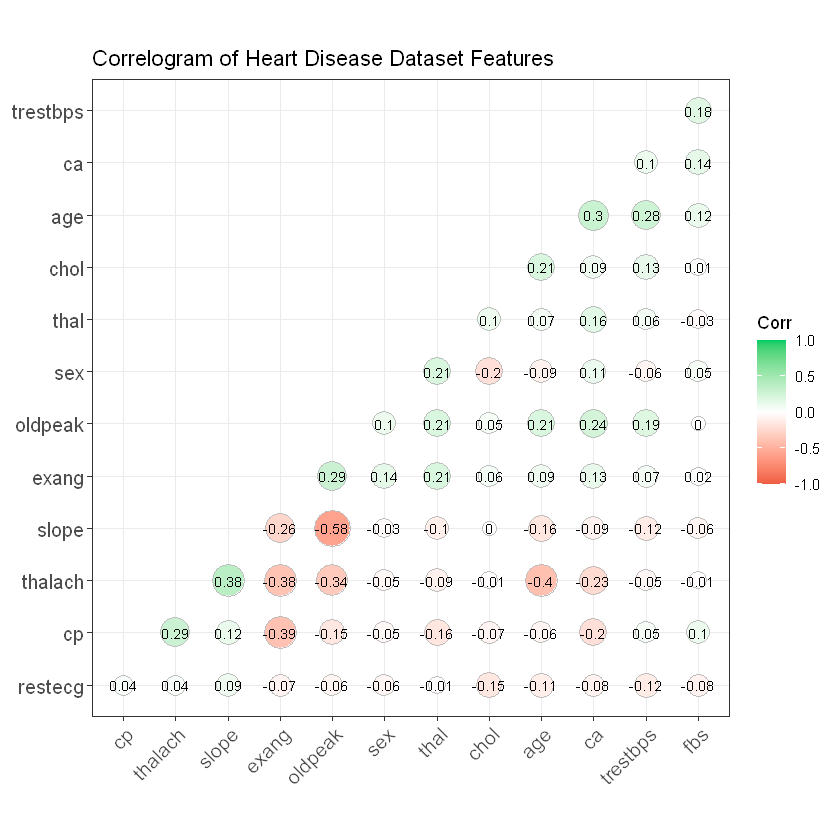

In [38]:
# Select relevant features for the correlogram
features <- heart_data %>%
  dplyr::select(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)

# Plot correlogram
correlation_matrix <- cor(features, use = "complete.obs")
ggcorrplot(correlation_matrix, hc.order = TRUE, type = "lower",
           lab = TRUE, lab_size = 3, method = "circle", 
           colors = c("tomato2", "white", "springgreen3"), 
           title = "Correlogram of Heart Disease Dataset Features", 
           ggtheme = theme_bw)

`age` , `sex` , `restecg` and `trestbps` are have higher correlation betwen other features with `chol` feature.

so we make new model with these features.

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part B:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Develop  a  multiple  linear  regression  model  for  the  response  variable 
using explanatory variables you found in part A.
</span>




In [39]:
# Build the multiple linear regression model
model_multiple <- lm(chol ~ age + trestbps + restecg + sex, data = heart_data)

# Summary of the model to check significance of predictors
summary(model_multiple)


Call:
lm(formula = chol ~ age + trestbps + restecg + sex, data = heart_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-117.250  -32.952   -2.788   27.330  287.656 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 197.0275    26.2278   7.512 6.87e-13 ***
age           0.9112     0.3315   2.749  0.00635 ** 
trestbps      0.1589     0.1703   0.933  0.35165    
restecg     -13.2623     5.4990  -2.412  0.01648 *  
sex         -20.5795     6.1701  -3.335  0.00096 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 49.54 on 297 degrees of freedom
Multiple R-squared:  0.09593,	Adjusted R-squared:  0.08376 
F-statistic: 7.879 on 4 and 297 DF,  p-value: 4.776e-06


##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part C:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     How well do you think your model fits the data?
</span>




1. **Residuals**:
   - The residuals show a wide range from -117.250 to 287.656, suggesting some large deviations between the observed and predicted values. The median residual is close to zero, indicating that the model does not systematically overestimate or underestimate cholesterol levels.

2. **Coefficients**:
   - The coefficients for the intercept and predictors show varying levels of significance:
     - **(Intercept)**: Highly significant $p < 0.001$, indicating a strong baseline effect.
     - **age**: Significant $p < 0.01$, with a positive association with cholesterol levels.
     - **trestbps**: Not significant $p = 0.35165$, indicating no clear relationship with cholesterol levels.
     - **restecg**: Significant $p < 0.05$, with a negative association with cholesterol levels.
     - **sex**: Highly significant $p < 0.001$, indicating a strong effect on cholesterol levels, with males likely having lower cholesterol compared to females (assuming `sex` is coded such that male = 1).

3. **Model Fit**:
   - **Multiple R-squared**: 0.09593
     - This indicates that approximately 9.59% of the variability in cholesterol levels is explained by the model. This is relatively low, suggesting that the model does not explain a large portion of the variance in cholesterol levels.
   - **Adjusted R-squared**: 0.08376
     - The adjusted R-squared is slightly lower than the multiple R-squared, accounting for the number of predictors in the model. This further indicates that the model has a limited explanatory power.
   - **F-statistic**: 7.879 on 4 and 297 DF, with a p-value of 4.776e-06
     - The F-statistic and its corresponding p-value indicate that the model as a whole is statistically significant. This means that at least one of the predictors is significantly associated with cholesterol levels.

4. **Residual Standard Error (RSE)**: 49.54
   - The RSE provides a measure of the average distance that the observed values fall from the regression line. A lower RSE would indicate a better fit. In this case, an RSE of 49.54 suggests a moderate level of error in the predictions.


The model has some statistically significant predictors (age, restecg, and sex), but overall it does not explain a large portion of the variance in cholesterol levels (R-squared ~ 9.59%).

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part D:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Develop the “best” possible multiple linear regression model for the 
response variable using different approaches and metrics.
</span>




In this part we use 2 techniques (`Backward elimination` and `Forward elimination`) for develope best model.

**Define the Full Model**

In [40]:
# Define the full model
full_model <- lm(chol ~ age + trestbps + restecg + sex, data = heart_data)

**Backward Elimination**

Backward elimination starts with the full model and iteratively removes the least significant predictor until all remaining predictors are significant.

In [41]:
# Perform backward elimination
backward_model <- step(full_model, direction = "backward")
summary(backward_model)

Start:  AIC=2362.22
chol ~ age + trestbps + restecg + sex

           Df Sum of Sq    RSS    AIC
- trestbps  1    2135.6 731001 2361.1
<none>                  728865 2362.2
- restecg   1   14274.8 743140 2366.1
- age       1   18543.3 747408 2367.8
- sex       1   27300.7 756166 2371.3

Step:  AIC=2361.11
chol ~ age + restecg + sex

          Df Sum of Sq    RSS    AIC
<none>                 731001 2361.1
- restecg  1     15418 746419 2365.4
- age      1     23808 754809 2368.8
- sex      1     27938 758939 2370.4



Call:
lm(formula = chol ~ age + restecg + sex, data = heart_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-121.676  -31.684   -2.967   26.838  283.575 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 213.8029    19.0882  11.201  < 2e-16 ***
age           0.9944     0.3192   3.115 0.002016 ** 
restecg     -13.7265     5.4752  -2.507 0.012707 *  
sex         -20.8026     6.1641  -3.375 0.000837 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 49.53 on 298 degrees of freedom
Multiple R-squared:  0.09328,	Adjusted R-squared:  0.08415 
F-statistic: 10.22 on 3 and 298 DF,  p-value: 2.004e-06


**Forward Selection**

Forward selection starts with no predictors and adds the most significant predictor at each step until no significant predictors are left.

In [42]:
# Define the null model (intercept only)
null_model <- lm(chol ~ 1, data = heart_data)

# Perform forward selection
forward_model <- step(null_model, scope = list(lower = null_model, upper = full_model), direction = "forward")
summary(forward_model)

Start:  AIC=2384.68
chol ~ 1

           Df Sum of Sq    RSS    AIC
+ age       1     34617 771588 2373.4
+ sex       1     30836 775370 2374.9
+ restecg   1     17564 788641 2380.0
+ trestbps  1     12649 793557 2381.9
<none>                  806206 2384.7

Step:  AIC=2373.43
chol ~ age

           Df Sum of Sq    RSS    AIC
+ sex       1   25169.9 746419 2365.4
+ restecg   1   12649.6 758939 2370.4
<none>                  771588 2373.4
+ trestbps  1    3886.3 767702 2373.9

Step:  AIC=2365.41
chol ~ age + sex

           Df Sum of Sq    RSS    AIC
+ restecg   1   15417.7 731001 2361.1
<none>                  746419 2365.4
+ trestbps  1    3278.6 743140 2366.1

Step:  AIC=2361.11
chol ~ age + sex + restecg

           Df Sum of Sq    RSS    AIC
<none>                  731001 2361.1
+ trestbps  1    2135.6 728865 2362.2



Call:
lm(formula = chol ~ age + sex + restecg, data = heart_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-121.676  -31.684   -2.967   26.838  283.575 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 213.8029    19.0882  11.201  < 2e-16 ***
age           0.9944     0.3192   3.115 0.002016 ** 
sex         -20.8026     6.1641  -3.375 0.000837 ***
restecg     -13.7265     5.4752  -2.507 0.012707 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 49.53 on 298 degrees of freedom
Multiple R-squared:  0.09328,	Adjusted R-squared:  0.08415 
F-statistic: 10.22 on 3 and 298 DF,  p-value: 2.004e-06


**Interpretation**

- **Model Fit**: Both approaches converge to the same final model: `chol ~ age + sex + restecg`.
- **Coefficients**: The coefficients and their significance levels are identical in both models.
- **AIC**: The AIC value is the same (2361.11) for the final model in both approaches.
- **Predictive Power**: The R-squared value (0.09328) indicates that the model explains about 9.33% of the variability in `chol`, which is relatively low.
- **Significance**:
  - `age` and `sex` are highly significant predictors.
  - `restecg` is also a significant predictor, but with a slightly higher p-value.

Both stepwise selection approaches lead to the same final model. This model suggests that `age`, `sex`, and `restecg` are significant predictors of cholesterol levels (`chol`). However, the overall fit of the model is modest, indicating that there may be other important predictors not included in the model.

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part E:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Use 5-fold cross-validation and compare the model’s RMSE (part B and 
C). How do you interpret these values? 
</span>




In [43]:
# Set seed for reproducibility
set.seed(42)

# Prepare the data
data <- heart_data %>%
  dplyr::select(chol, age, trestbps, restecg, sex)

# Define the models
model_a <- chol ~ age + trestbps + restecg + sex
model_b <- chol ~ age + sex + restecg

# Set up 5-fold cross-validation
train_control <- trainControl(method = "cv", number = 5)

# Train model A using 5-fold cross-validation
model_a_cv <- train(model_a, data = data, method = "lm", trControl = train_control, metric = "RMSE")

# Train model B using 5-fold cross-validation
model_b_cv <- train(model_b, data = data, method = "lm", trControl = train_control, metric = "RMSE")

# Extract the RMSE for each model
rmse_a <- model_a_cv$results$RMSE
rmse_b <- model_b_cv$results$RMSE

# Print the RMSE for each model
cat("Model A RMSE:", rmse_a, "\n")
cat("Model B RMSE:", rmse_b, "\n")

Model A RMSE: 49.71638 
Model B RMSE: 49.53163 


Based on the results from the 5-fold cross-validation:

- **Model A** (which includes age, trestbps, restecg, and sex) has an RMSE of 49.71638.
- **Model B** (which includes age, restecg, and sex) has an RMSE of 49.53163.

Both models have similar RMSE values, indicating their performance is quite close. However, Model B has a slightly lower RMSE than Model A. This means that Model B, which uses fewer predictors (excluding trestbps), has a marginally better predictive accuracy for cholesterol levels in this dataset.

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part F:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Check  diagnostics  for  your  model  in  part  C  (Three  conditions:  1. 
Linearity,  2.  Nearly  normal  residuals,  and  3.  Constant  variability)  and 
explain if this is a reliable model or not.
</span>




Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"


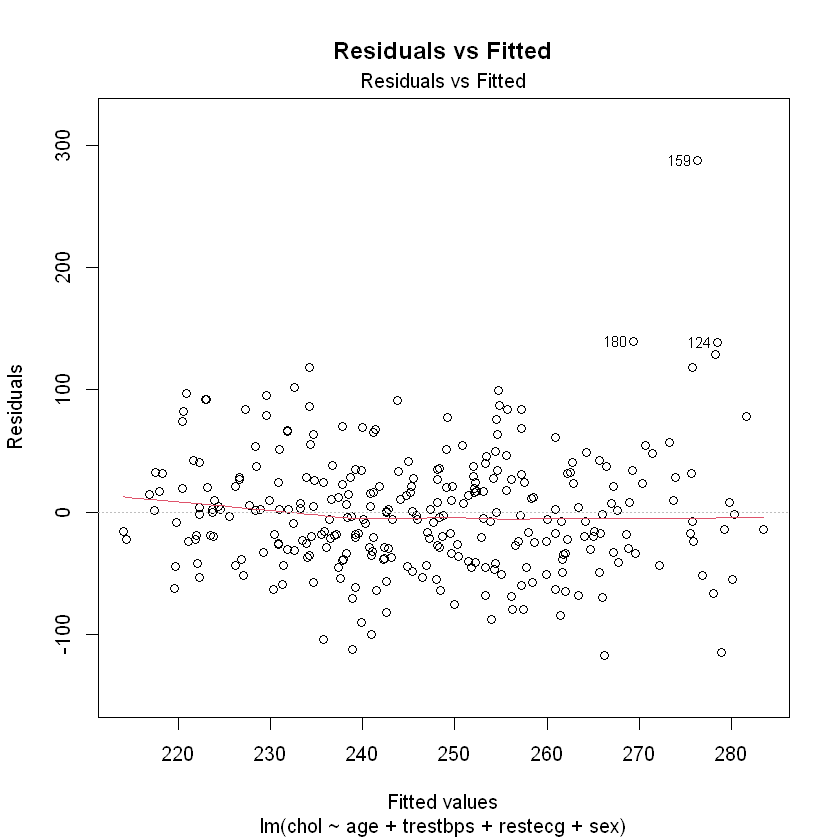

159 180 
129 145

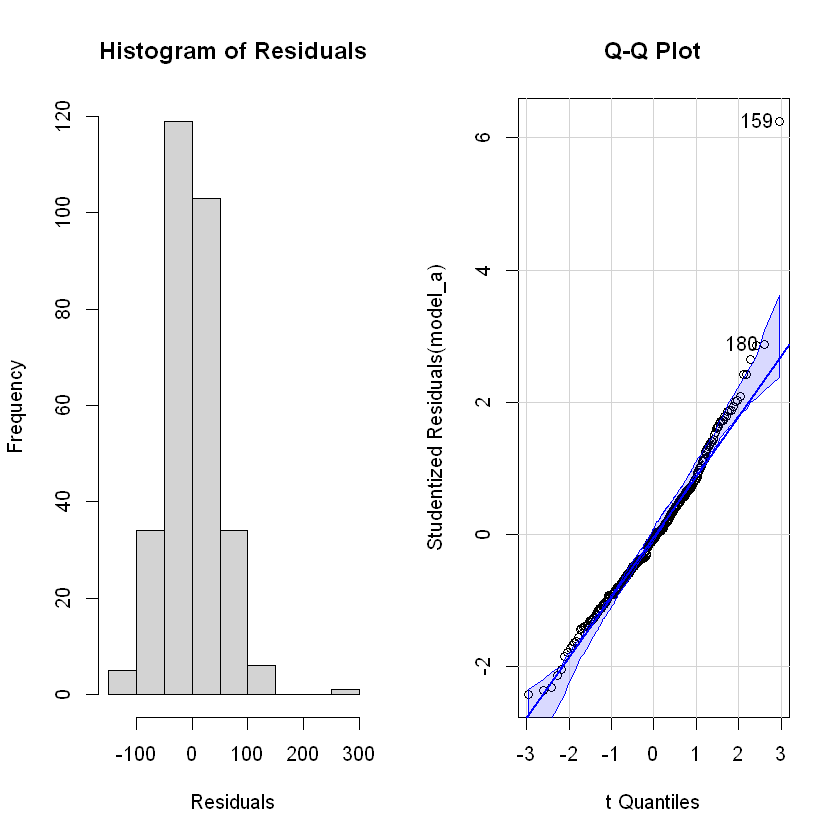

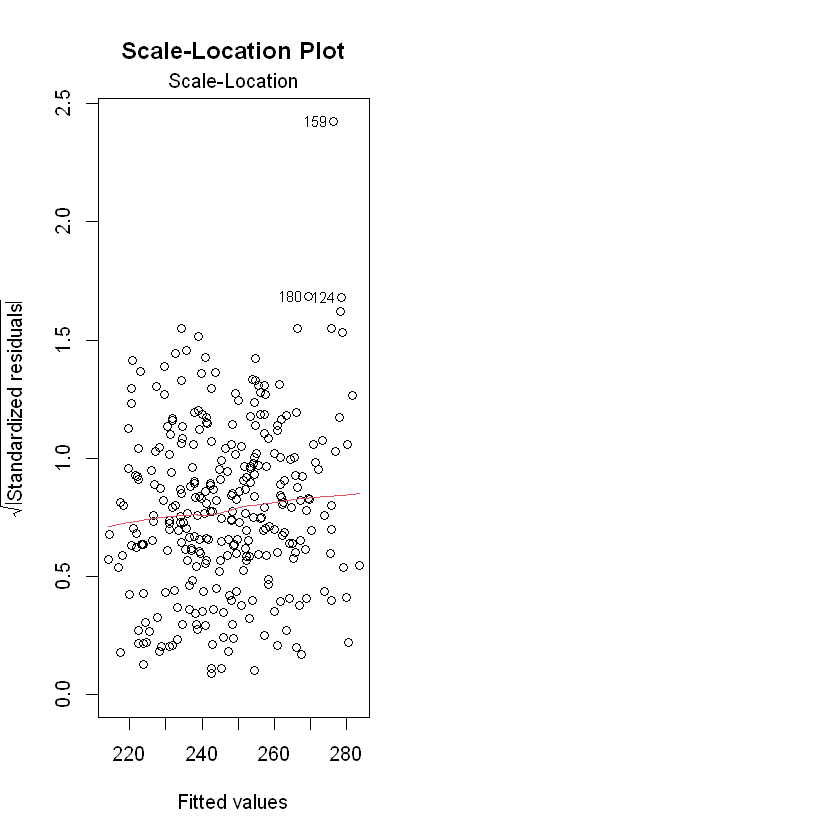

In [48]:
# Fit the full model
model_a <- lm(chol ~ age + trestbps + restecg + sex, data = heart_data)

# 1. Linearity: Plot residuals vs. fitted values
plot(model_a, which = 1, main = "Residuals vs Fitted")

# 2. Nearly normal residuals: Plot histogram of residuals and Q-Q plot
par(mfrow = c(1, 2))
hist(residuals(model_a), main = "Histogram of Residuals", xlab = "Residuals")
qqPlot(model_a, main = "Q-Q Plot")

# 3. Constant variability: Plot scale-location plot
plot(model_a, which = 3, main = "Scale-Location Plot")

# Reset plotting layout
par(mfrow = c(1, 1))

- **Linearity**: The model seems to meet the linearity condition because the residuals vs. fitted values plot does not show any clear pattern.

- **Normality of Residuals**: The residuals look roughly normally distributed with some minor differences.

- **Constant Variability**: The residuals have about the same spread across all fitted values, with only small differences.

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part G:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     What percent of the variation in the response variable is explained by 
the model (part B and C)?
</span>




In [50]:
# Load necessary libraries
library(dplyr)

# Fit Model A
model_a <- lm(chol ~ age + trestbps + restecg + sex, data = heart_data)

# Fit Model B
model_b <- lm(chol ~ age + sex + restecg, data = heart_data)

# Get R-squared values
r_squared_a <- summary(model_a)$r.squared
r_squared_b <- summary(model_b)$r.squared

# Print R-squared values
cat("Model A R-squared:", r_squared_a, "\n")
cat("Model B R-squared:", r_squared_b, "\n")

# Convert R-squared to percentage
percent_explained_a <- r_squared_a * 100
percent_explained_b <- r_squared_b * 100

# Print percentages
cat("Model A explains", percent_explained_a, "% of the variation in the response variable.\n")
cat("Model B explains", percent_explained_b, "% of the variation in the response variable.\n")

Model A R-squared: 0.09593122 
Model B R-squared: 0.09328224 
Model A explains 9.593122 % of the variation in the response variable.
Model B explains 9.328224 % of the variation in the response variable.


**Model A explains about 9.59% of the variation in cholesterol levels. Model B explains about 9.33% of the variation in cholesterol levels. Both models explain a similar amount of variation, with Model A being slightly better.**

<hr>

### <span style='color:#2ECC71; font-family: "Arial", sans-serif; font-size: 1.3em; font-weight: bold;'>Question 6</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
Choose a binary categorical variable from your dataset as a response variable 
and choose several categorical and numerical variables which you think can 
best explain the response variable. 
</span>

#### <span style='color:#E74C3C; font-family: "Arial", sans-serif; font-size: 1.1em; font-weight: bold;'>Answer</span>

I choose `target` column as binary categorical feature.

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part A:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Construct  a  logistic  regression  model  and  interpret  the  intercept  and 
the slopes in terms of log odds and log odds ratio.
</span>




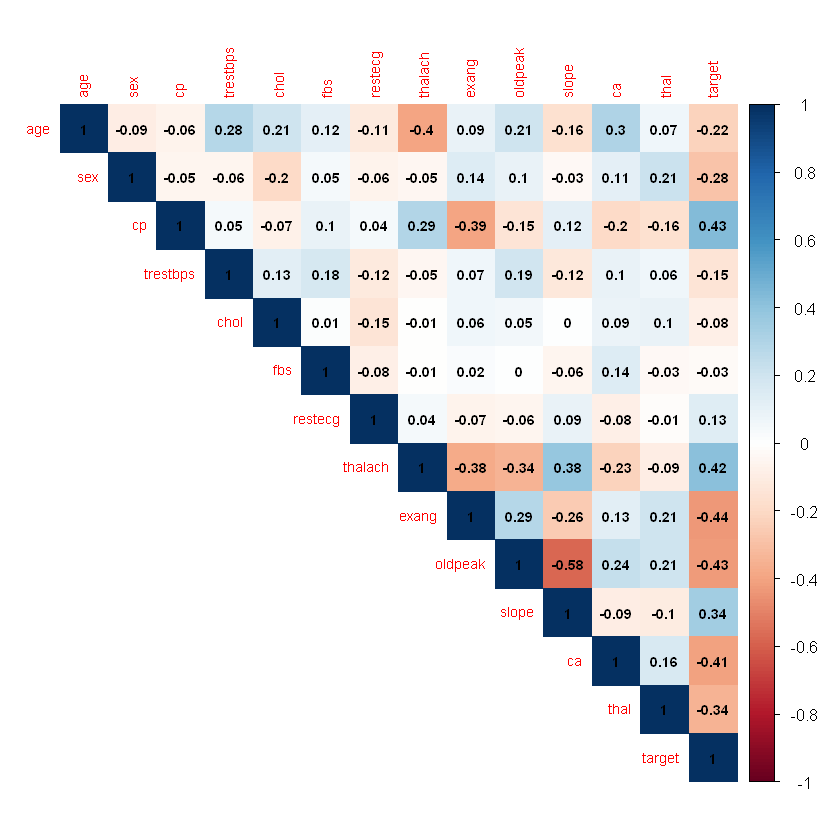

In [55]:
# Calculate the correlation matrix
cor_matrix <- cor(heart_data, use = "complete.obs")

# Plot the correlation matrix
corrplot(cor_matrix, method = "color", type = "upper", tl.cex = 0.7, number.cex = 0.7, addCoef.col = "black")

**Based on above correlation matrix :**

*I choose these variables (that have high `corr` (positive or negative)) :*

- `cp`
- `thalach`
- `exang`
- `oldpeak`
- `slope`
- `ca`
- `thal`


In [57]:
# Create formula for the model using selected features
selected_features <- c("cp", "thalach", "exang", "oldpeak", "slope", "ca", "thal")
formula <- as.formula(paste("target ~", paste(selected_features, collapse = " + ")))

# Fit the logistic regression model
final_model <- glm(formula, data = heart_data, family = binomial)

# Summary of the final model
summary(final_model)


Call:
glm(formula = formula, family = binomial, data = heart_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.269009   1.419246   0.190 0.849667    
cp           0.742332   0.173198   4.286 1.82e-05 ***
thalach      0.016292   0.008474   1.923 0.054534 .  
exang       -1.024624   0.379585  -2.699 0.006948 ** 
oldpeak     -0.637511   0.206251  -3.091 0.001995 ** 
slope        0.480563   0.329745   1.457 0.145012    
ca          -0.866477   0.188250  -4.603 4.17e-06 ***
thal        -1.045664   0.275352  -3.798 0.000146 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 416.42  on 301  degrees of freedom
Residual deviance: 232.90  on 294  degrees of freedom
AIC: 248.9

Number of Fisher Scoring iterations: 5


$\log\left(\frac{P(Y=1)}{P(Y=0)}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_k X_k$

**Intercept $\beta_0$**

The intercept $\beta_0 = 0.269009$ represents the log odds of the target variable being 1 when all predictor variables are zero. In terms of odds, it means:

$\text{Odds} = e^{\beta_0} = e^{0.269009} \approx 1.308$

This indicates that when all predictor variables are zero, the odds of the target being 1 are approximately 1.308 to 1.

**Coefficients (Slopes)**

Each coefficient represents the change in the log odds of the target variable being 1 for a one-unit increase in the predictor variable, holding all other variables constant.

**$\beta_1$ (cp)**

$\beta_1 = 0.742332$

For each one-unit increase in `cp`, the log odds of the target variable being 1 increases by 0.742332. In terms of odds ratio:

$\text{Odds Ratio} = e^{0.742332} \approx 2.100$

This means that for each one-unit increase in `cp`, the odds of the target being 1 are approximately 2.1 times higher, holding all other variables constant.

**$\beta_2$ (thalach)**

$\beta_2 = 0.016292$

For each one-unit increase in `thalach`, the log odds of the target variable being 1 increases by 0.016292. In terms of odds ratio:

$\text{Odds Ratio} = e^{0.016292} \approx 1.016$

This means that for each one-unit increase in `thalach`, the odds of the target being 1 are approximately 1.016 times higher, holding all other variables constant.

**$\beta_3$ (exang)**

$\beta_3 = -1.024624$

For each one-unit increase in `exang`, the log odds of the target variable being 1 decreases by 1.024624. In terms of odds ratio:

$\text{Odds Ratio} = e^{-1.024624} \approx 0.359$

This means that for each one-unit increase in `exang`, the odds of the target being 1 are approximately 0.359 times lower (or 64.1% lower), holding all other variables constant.

**$\beta_4$ (oldpeak)**

$\beta_4 = -0.637511$

For each one-unit increase in `oldpeak`, the log odds of the target variable being 1 decreases by 0.637511. In terms of odds ratio:

$\text{Odds Ratio} = e^{-0.637511} \approx 0.529$

This means that for each one-unit increase in `oldpeak`, the odds of the target being 1 are approximately 0.529 times lower (or 47.1% lower), holding all other variables constant.

**$\beta_5$ (slope)**

$\beta_5 = 0.480563$

For each one-unit increase in `slope`, the log odds of the target variable being 1 increases by 0.480563. In terms of odds ratio:

$\text{Odds Ratio} = e^{0.480563} \approx 1.617$

This means that for each one-unit increase in `slope`, the odds of the target being 1 are approximately 1.617 times higher, holding all other variables constant.

**$\beta_6$ (ca)**

$\beta_6 = -0.866477$

For each one-unit increase in `ca`, the log odds of the target variable being 1 decreases by 0.866477. In terms of odds ratio:

$\text{Odds Ratio} = e^{-0.866477} \approx 0.420$

This means that for each one-unit increase in `ca`, the odds of the target being 1 are approximately 0.420 times lower (or 58% lower), holding all other variables constant.

**$\beta_7$ (thal)**

$\beta_7 = -1.045664$

For each one-unit increase in `thal`, the log odds of the target variable being 1 decreases by 1.045664. In terms of odds ratio:

$\text{Odds Ratio} = e^{-1.045664} \approx 0.352$

This means that for each one-unit increase in `thal`, the odds of the target being 1 are approximately 0.352 times lower (or 64.8% lower), holding all other variables constant.


**The significance of each coefficient is indicated by its p-value. For example, `cp`, `exang`, `oldpeak`, `ca`, and `thal` have significant effects on the log odds of the target variable, while `thalach` and `slope` are less significant.**

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part B:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Draw  the  ROC  curve  for  the  model.  What  does  this  diagram  signify? 
Discuss the goodness of the model based on the AUC.
</span>




Setting levels: control = 0, case = 1

Setting direction: controls < cases



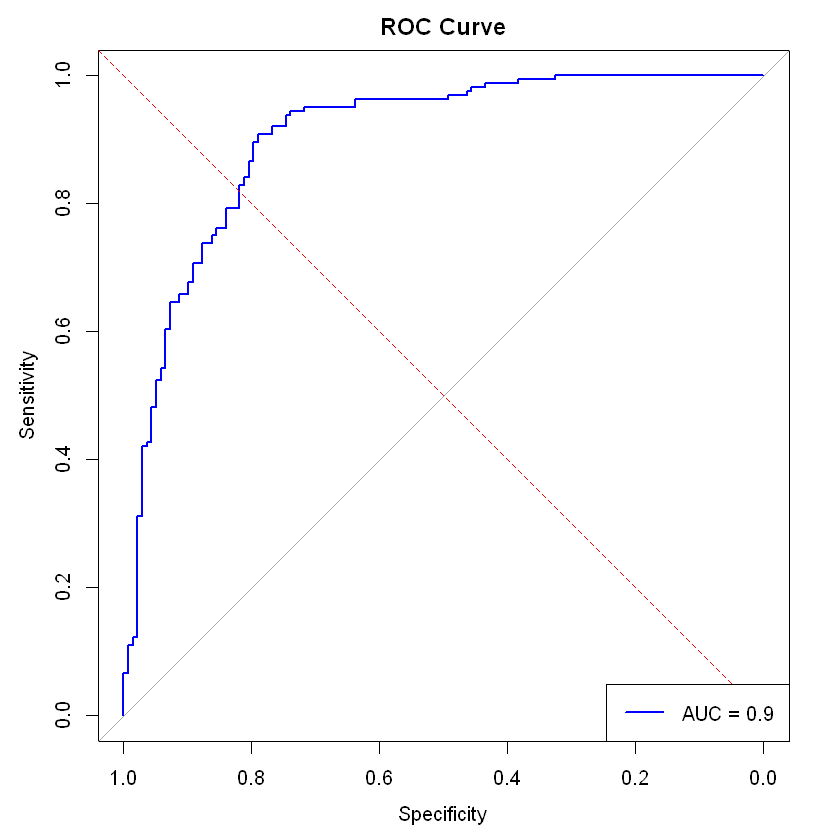

In [63]:
# Convert target variable to a factor
heart_data$target <- as.factor(heart_data$target)

# Selected features
selected_features <- c("cp", "thalach", "exang", "oldpeak", "slope", "ca", "thal")

# Create formula for the model using selected features
formula <- as.formula(paste("target ~", paste(selected_features, collapse = " + ")))

# Fit the logistic regression model on the entire dataset
final_model <- glm(formula, data = heart_data, family = binomial)

# Predict probabilities on the entire dataset
pred_probs <- predict(final_model, newdata = heart_data, type = "response")

# Create the ROC curve
roc_curve <- roc(heart_data$target, pred_probs)

# Plot the ROC curve
plot(roc_curve, main="ROC Curve", col="blue", lwd=2)
abline(a=0, b=1, lty=2, col="red")

# Add AUC to the plot
auc_value <- auc(roc_curve)
legend("bottomright", legend=paste("AUC =", round(auc_value, 2)), col="blue", lwd=2)

**Based on the ROC curve and the AUC value of 0.9, we can conclude that the logistic regression model is very good at distinguishing between the positive and negative classes in this dataset. This indicates a high level of accuracy and reliability in the model's predictions.**

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part C:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Choose  a  categorical  variable  in  your  model  among  the  explanatory 
variables  and  plot  the  odds  ratio  curve  for  that  variable.  Interpret  the 
plot.
</span>




I choose `cp`


Call:
glm(formula = formula, family = binomial, data = heart_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.146022   1.427263   0.102 0.918511    
cp1          1.149006   0.509655   2.254 0.024166 *  
cp2          1.845598   0.424801   4.345 1.40e-05 ***
cp3          1.651674   0.603384   2.737 0.006194 ** 
thalach      0.015311   0.008556   1.790 0.073530 .  
exang       -0.946358   0.385319  -2.456 0.014048 *  
oldpeak     -0.570725   0.212653  -2.684 0.007278 ** 
slope        0.506652   0.334284   1.516 0.129613    
ca          -0.877836   0.189405  -4.635 3.57e-06 ***
thal        -1.026805   0.275825  -3.723 0.000197 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 416.42  on 301  degrees of freedom
Residual deviance: 230.11  on 292  degrees of freedom
AIC: 250.11

Number of Fisher Scoring iterations: 5


Waiting for profiling to be done...



    cp odds_ratio lower_ci upper_ci
cp1  1   3.155056 1.192399  8.94744
cp2  2   6.331885 2.816847 15.02895
cp3  3   5.215706 1.662750 18.14936


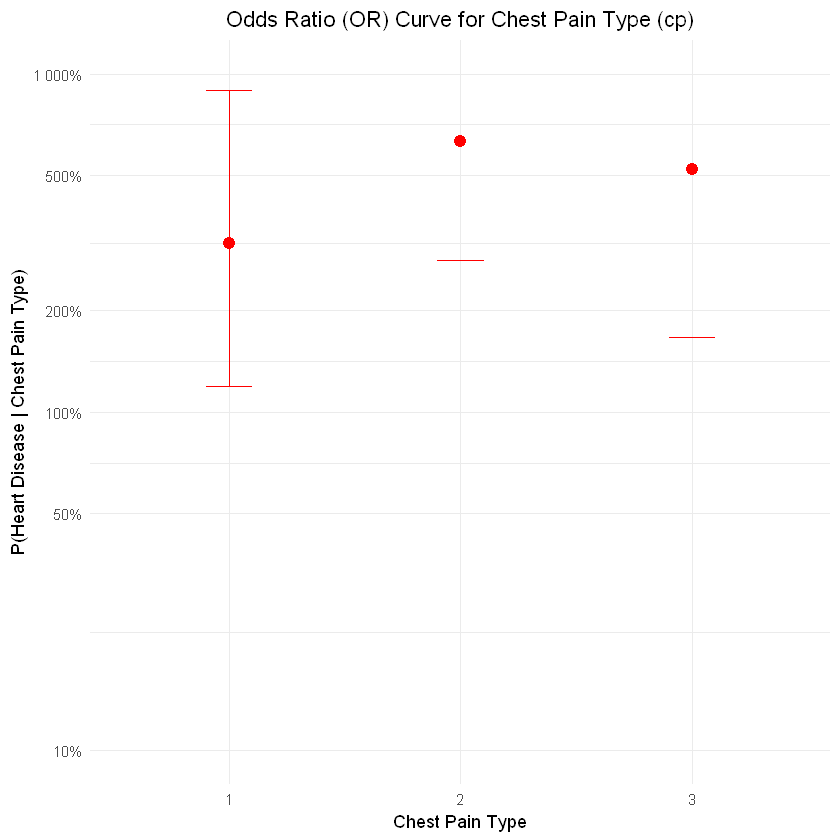

In [69]:
# Convert target variable to a factor
heart_data$target <- as.factor(heart_data$target)
heart_data$cp <- as.factor(heart_data$cp)  

# Selected features
selected_features <- c("cp", "thalach", "exang", "oldpeak", "slope", "ca", "thal")

# Create formula for the model using selected features
formula <- as.formula(paste("target ~", paste(selected_features, collapse = " + ")))

# Fit the logistic regression model on the entire dataset
final_model <- glm(formula, data = heart_data, family = binomial)

# Summary of the model
summary(final_model)

# Extract coefficients for each level of cp
coefficients <- coef(summary(final_model))
coeff_names <- rownames(coefficients)

# Extract relevant coefficients and confidence intervals for cp levels
cp_coeffs <- coefficients[grep("cp", coeff_names), "Estimate"]
cp_conf_int <- confint(final_model, parm = grep("cp", coeff_names))

# Calculate odds ratios and confidence intervals for each level of cp
odds_ratios <- exp(cp_coeffs)
conf_int <- exp(cp_conf_int)

# Create a data frame for plotting
cp_plot_data <- data.frame(
  cp = levels(heart_data$cp)[-1],  # Exclude the reference level
  odds_ratio = odds_ratios,
  lower_ci = conf_int[, 1],
  upper_ci = conf_int[, 2]
)

# Print the odds ratios and confidence intervals
print(cp_plot_data)

# Plot the odds ratio curve with customization to mimic the example plot
ggplot(cp_plot_data, aes(x = cp, y = odds_ratio)) +
  geom_point(size = 3, color = "red") +
  geom_errorbar(aes(ymin = lower_ci, ymax = upper_ci), width = 0.2, color = "red") +
  labs(title = "Odds Ratio (OR) Curve for Chest Pain Type (cp)",
       x = "Chest Pain Type",
       y = "P(Heart Disease | Chest Pain Type)") +
  scale_y_continuous(trans = 'log10', limits = c(0.1, 10), breaks = c(0.1, 0.5, 1, 2, 5, 10), labels = scales::percent_format()) +
  scale_x_discrete(labels = levels(heart_data$cp)[-1]) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

The plot shows the odds ratios for different types of chest pain (`cp`) compared to the reference type (not shown). The red dots represent the odds ratios, and the error bars show the 95% confidence intervals.

- Type 1 chest pain has a high odds ratio with wide confidence intervals, indicating a significant but uncertain increase in the risk of heart disease.
- Type 2 chest pain has a higher and more certain increase in the risk of heart disease.
- Type 3 chest pain also has an increased risk with a reliable confidence interval.

Overall, these chest pain types are associated with a higher risk of heart disease compared to the reference type.

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part D:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Calculate a 95% confidence interval for the odds ratio
</span>




In [70]:
print(cp_plot_data)

    cp odds_ratio lower_ci upper_ci
cp1  1   3.155056 1.192399  8.94744
cp2  2   6.331885 2.816847 15.02895
cp3  3   5.215706 1.662750 18.14936


**For chest pain type 1 (cp1), the odds of having heart disease are about 3.16 times higher, with a 95% confidence interval from 1.19 to 8.95. For chest pain type 2 (cp2), the odds are about 6.33 times higher, with a confidence interval from 2.82 to 15.03. For chest pain type 3 (cp3), the odds are about 5.22 times higher, with a confidence interval from 1.66 to 18.15. This means all three types of chest pain significantly increase the risk of heart disease compared to the reference type.**

<hr>

### <span style='color:#2ECC71; font-family: "Arial", sans-serif; font-size: 1.3em; font-weight: bold;'>Question 7</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
Please answer the following questions in respect to the model in the previous 
question. 
</span>

#### <span style='color:#E74C3C; font-family: "Arial", sans-serif; font-size: 1.1em; font-weight: bold;'>Answer</span>

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part A:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Which explanatory variable in the model plays the most significant role 
in the prediction? Why?
</span>




**Chest pain type (`cp`)** is the most important predictor of heart disease in the model because it has a very low p-value and high odds ratios. This means different types of chest pain are strongly linked to the risk of heart disease, making `cp` a key factor in predicting heart disease.

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part B:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Select another categorical variable except the response variable from 
the model, draw the OR (odd ratio) curve for this categorical variable 
and interpret the plot.
</span>




I select `slope`


Call:
glm(formula = formula, family = binomial, data = heart_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.357974   2.509726  -0.541   0.5884    
cp1          0.932390   0.537830   1.734   0.0830 .  
cp2          1.772088   0.446167   3.972 7.13e-05 ***
cp3          1.502482   0.607714   2.472   0.0134 *  
thalach      0.010791   0.009122   1.183   0.2368    
exang       -0.803640   0.403948  -1.989   0.0466 *  
oldpeak     -0.546398   0.220292  -2.480   0.0131 *  
slope1      -0.708870   0.801975  -0.884   0.3767    
slope2       0.078514   0.874698   0.090   0.9285    
ca          -0.882737   0.202356  -4.362 1.29e-05 ***
thal1        0.950637   2.099369   0.453   0.6507    
thal2        1.605213   2.011930   0.798   0.4250    
thal3       -0.221276   2.013028  -0.110   0.9125    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 416.42  on 301  

Waiting for profiling to be done...



[1] 3

[1] 2

       slope odds_ratio   lower_ci upper_ci
slope1     1  0.4921999 0.09844912 2.287173
slope2     2  1.0816783 0.18398218 5.707837


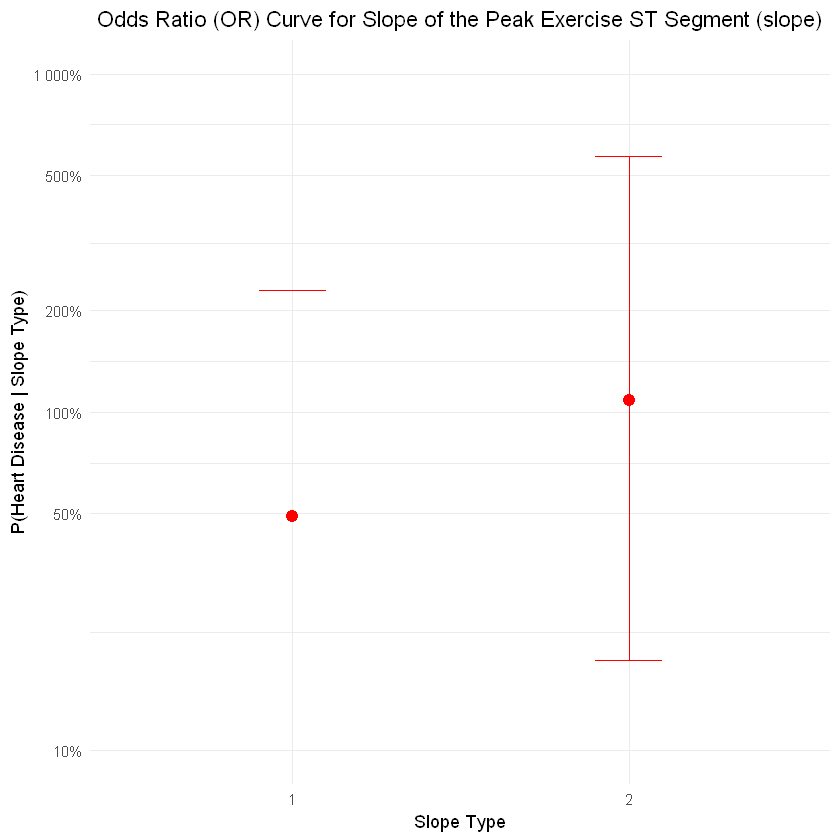

In [77]:
# Convert target and `slope` variable to factors
heart_data$target <- as.factor(heart_data$target)
heart_data$slope <- as.factor(heart_data$slope)

# Selected features
selected_features <- c("cp", "thalach", "exang", "oldpeak", "slope", "ca", "thal")

# Create formula for the model using selected features
formula <- as.formula(paste("target ~", paste(selected_features, collapse = " + ")))

# Fit the logistic regression model on the entire dataset
final_model <- glm(formula, data = heart_data, family = binomial)

# Summary of the model
summary(final_model)

# Extract coefficients for each level of slope
coefficients <- coef(summary(final_model))
coeff_names <- rownames(coefficients)

# Extract relevant coefficients and confidence intervals for slope levels
slope_coeff_indices <- grep("slope", coeff_names)
slope_levels <- levels(heart_data$slope)

# Calculate odds ratios and confidence intervals for each level of slope
slope_coeffs <- coefficients[slope_coeff_indices, "Estimate"]
slope_conf_int <- confint(final_model, parm = slope_coeff_indices)
slope_odds_ratios <- exp(slope_coeffs)
slope_conf_int <- exp(slope_conf_int)

# Check the number of levels in slope
length(slope_levels) 
length(slope_coeffs)  

# Create a data frame for plotting
# Adjust for reference level, which is not included in the coefficients
if (length(slope_levels) - 1 != length(slope_coeffs)) {
  stop("The number of slope levels and coefficients do not match.")
}

slope_plot_data <- data.frame(
  slope = slope_levels[-1],  # Exclude the reference level
  odds_ratio = slope_odds_ratios,
  lower_ci = slope_conf_int[, 1],
  upper_ci = slope_conf_int[, 2]
)

# Print the odds ratios and confidence intervals
print(slope_plot_data)

# Plot the odds ratio curve with customization to mimic the example plot
ggplot(slope_plot_data, aes(x = slope, y = odds_ratio)) +
  geom_point(size = 3, color = "red") +
  geom_errorbar(aes(ymin = lower_ci, ymax = upper_ci), width = 0.2, color = "red") +
  labs(title = "Odds Ratio (OR) Curve for Slope of the Peak Exercise ST Segment (slope)",
       x = "Slope Type",
       y = "P(Heart Disease | Slope Type)") +
  scale_y_continuous(trans = 'log10', limits = c(0.1, 10), breaks = c(0.1, 0.5, 1, 2, 5, 10), labels = scales::percent_format()) +
  scale_x_discrete(labels = slope_levels[-1]) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

**The plot shows the odds ratios for different types of the slope of the peak exercise ST segment compared to the reference type. For slope type 1, the odds ratio is around 50%, meaning it is less likely to predict heart disease compared to the reference. For slope type 2, the odds ratio is higher, indicating an increased likelihood of predicting heart disease. The error bars show the 95% confidence intervals, illustrating the range within which the true odds ratios are likely to fall.**

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part C:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
      Select explanatory variables with the most meaningful roles in the 
model prediction, and construct the new Logistic Regression model, 
and then interpret the result.
</span>




Based on the previous model summary, `cp`, `ca`, and `thal` are among the most significant predictors.

In [78]:
# Convert target and relevant explanatory variables to factors
heart_data$target <- as.factor(heart_data$target)
heart_data$cp <- as.factor(heart_data$cp)
heart_data$ca <- as.factor(heart_data$ca)
heart_data$thal <- as.factor(heart_data$thal)

# Selected best features
selected_features <- c("cp", "ca", "thal")

# Create formula for the new model using selected features
new_formula <- as.formula(paste("target ~", paste(selected_features, collapse = " + ")))

# Fit the new logistic regression model on the entire dataset
new_model <- glm(new_formula, data = heart_data, family = binomial)

# Summary of the new model
summary(new_model)


Call:
glm(formula = new_formula, family = binomial, data = heart_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.12846    1.65978  -0.680 0.496578    
cp1          1.92391    0.49425   3.893 9.92e-05 ***
cp2          2.25692    0.43685   5.166 2.39e-07 ***
cp3          1.58151    0.54344   2.910 0.003612 ** 
ca1         -2.07093    0.42363  -4.888 1.02e-06 ***
ca2         -2.41697    0.58027  -4.165 3.11e-05 ***
ca3         -2.63871    0.78129  -3.377 0.000732 ***
ca4          0.37822    1.52686   0.248 0.804360    
thal1        0.75505    1.76471   0.428 0.668752    
thal2        2.18930    1.67885   1.304 0.192219    
thal3       -0.09057    1.67532  -0.054 0.956887    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 416.42  on 301  degrees of freedom
Residual deviance: 230.27  on 291  degrees of freedom
AIC: 252.27

Number of Fisher Scoring itera

1. **Chest Pain Type (cp):**
   - `cp1`, `cp2`, and `cp3` have positive coefficients and very low p-values, indicating they significantly increase the odds of heart disease. 
   - For example, `cp2` has a coefficient of 2.26, meaning it greatly increases the risk of heart disease.

2. **Number of Major Vessels Colored by Fluoroscopy (ca):**
   - `ca1`, `ca2`, and `ca3` have negative coefficients with very low p-values, indicating they significantly decrease the odds of heart disease.
   - For instance, `ca2` has a coefficient of -2.42, meaning it greatly reduces the risk of heart disease.

3. **Thalassemia (thal):**
   - None of the `thal` levels are statistically significant (high p-values), suggesting that `thal` may not be a strong predictor in this model.

4. **Intercept:**
   - The intercept is not significant, indicating that the baseline log-odds are not meaningful without considering the predictors.

**In summary, chest pain type (`cp`) and the number of major vessels (`ca`) are significant predictors of heart disease, while thalassemia (`thal`) is not.**

##### <span style='color:#3498DB; font-family: "Helvetica", Arial, sans-serif; font-size: 1.2em; font-weight: bold;'>Part D:</span>

<span style='font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif; font-size: 1.2em; font-weight: bold;'>
     Draw the utility curve for the model you’ve created in part C (define the 
utility of different outcomes yourself). What is the best threshold for this 
model?
</span>




Warning message in geom_point(aes(x = best_threshold, y = best_utility), color = "red", :
"All aesthetics have length 1, but the data has 101 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "Best Threshold: 0.31"
[1] "Maximum Utility: 995"


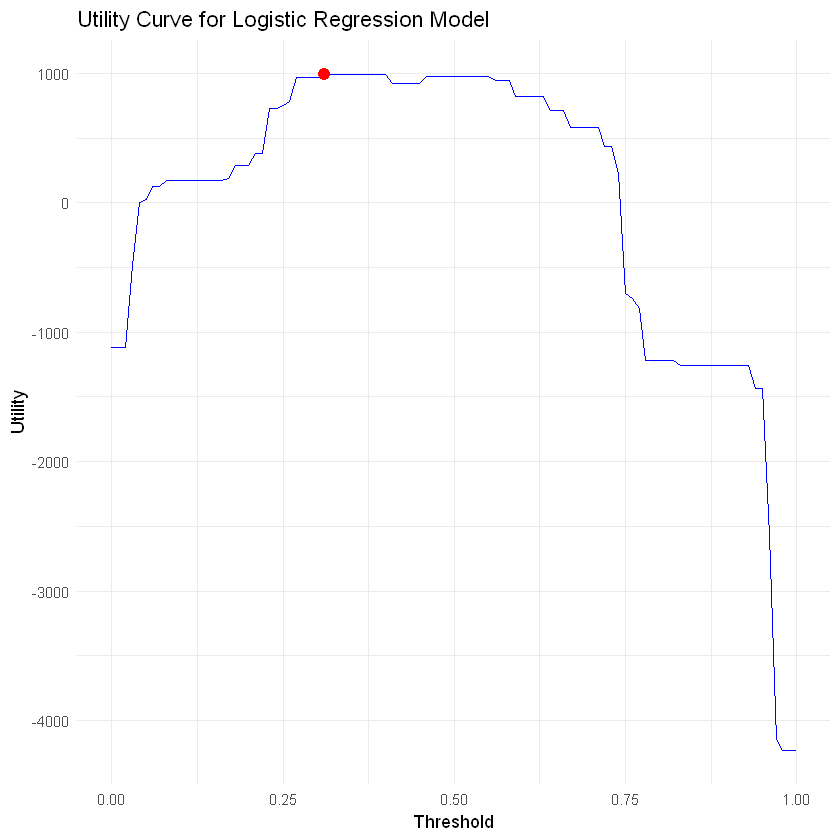

In [96]:
# Convert target and relevant explanatory variables to factors
heart_data$target <- as.factor(heart_data$target)
heart_data$cp <- as.factor(heart_data$cp)
heart_data$ca <- as.factor(heart_data$ca)
heart_data$thal <- as.factor(heart_data$thal)

# Selected best features
selected_features <- c("cp", "ca", "thal")

# Create formula for the new model using selected features
new_formula <- as.formula(paste("target ~", paste(selected_features, collapse = " + ")))

# Fit the new logistic regression model on the entire dataset
new_model <- glm(new_formula, data = heart_data, family = binomial)

# Calculate predicted probabilities
pred_probs <- predict(new_model, type = "response")

# Define utility values
utility_values <- list(TP = 10, TN = 5, FP = -20, FN = -30)

# Initialize a data frame to store utilities for different thresholds
thresholds <- seq(0, 1, by = 0.01)
utility_data <- data.frame(threshold = thresholds, utility = NA)

# Function to calculate utility
calculate_utility <- function(threshold, pred_probs, true_labels, utility_values) {
  predicted <- ifelse(pred_probs > threshold, 1, 0)
  
  # Confusion matrix
  confusion <- table(predicted, true_labels)
  
  # Initialize counts
  TP <- TN <- FP <- FN <- 0
  
  if ("1" %in% rownames(confusion) && "1" %in% colnames(confusion)) {
    TP <- confusion["1", "1"]
  }
  if ("0" %in% rownames(confusion) && "0" %in% colnames(confusion)) {
    TN <- confusion["0", "0"]
  }
  if ("1" %in% rownames(confusion) && "0" %in% colnames(confusion)) {
    FP <- confusion["1", "0"]
  }
  if ("0" %in% rownames(confusion) && "1" %in% colnames(confusion)) {
    FN <- confusion["0", "1"]
  }
  
  # Calculate total utility
  total_utility <- (TP * utility_values$TP) + (TN * utility_values$TN) + (FP * utility_values$FP) + (FN * utility_values$FN)
  return(total_utility)
}

# Calculate utility for each threshold
for (i in seq_along(thresholds)) {
  threshold <- thresholds[i]
  utility_data$utility[i] <- calculate_utility(threshold, pred_probs, heart_data$target, utility_values)
}

# Find the best threshold (maximum utility)
best_threshold <- utility_data$threshold[which.max(utility_data$utility)]
best_utility <- max(utility_data$utility)

# Plot the utility curve
ggplot(utility_data, aes(x = threshold, y = utility)) +
  geom_line(color = "blue") +
  geom_point(aes(x = best_threshold, y = best_utility), color = "red", size = 3) +
  labs(title = "Utility Curve for Logistic Regression Model",
       x = "Threshold",
       y = "Utility") +
  theme_minimal()

# Print the best threshold and its utility
print(paste("Best Threshold:", best_threshold))
print(paste("Maximum Utility:", best_utility))

- **Best Threshold (0.31):**
  - When the predicted probability of heart disease is greater than 0.31, the model classifies the individual as having heart disease.
  - This threshold maximizes the total utility, meaning it provides the best trade-off between predicting true positives (correctly identifying heart disease) and avoiding false positives (incorrectly predicting heart disease).

- **Maximum Utility (995):**
  - The utility value of 995 indicates the net benefit achieved by the model at the best threshold.
  - This value is calculated by assigning positive utility to true positives and true negatives, and negative utility to false positives and false negatives, according to the defined utility values:
    - True Positive (TP): +10
    - True Negative (TN): +5
    - False Positive (FP): -20
    - False Negative (FN): -30